In [1]:
!pip install kneed

import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy

SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Real number of people
clusters_real = np.arange(0,3038) 

clusters_real[0:445] = 1
clusters_real[445:905] = 0
clusters_real[905:1240] = 1
clusters_real[1240:1443] = 2
clusters_real[1443:1598] = 3
clusters_real[1598:1636] = 4
clusters_real[1636:1980] = 5
clusters_real[1980:2020] = 6
clusters_real[2020:2137] = 5
clusters_real[2137:2490] = 6
clusters_real[2490:2557] = 5
clusters_real[2557:2716] = 4
clusters_real[2716:2755] = 3
clusters_real[2755:2844] = 2
clusters_real[2844:2960] = 1
clusters_real[2960:3038] = 2

error = []

#data
def loadData(only_1to6 = False):

  csv_data = []

  if only_1to6:
    csv_data.append('10:39:41|90640-D87 22DF-2.65-0x33|22.47|22.69|22.69|23.05|23.13|23.39|23.67|23.75|23.79|24.19|24.13|24.01|23.83|23.71|23.49|23.57|23.49|23.65|23.43|23.39|23.27|23.47|23.53|23.61|24.19|24.29|24.09|23.95|23.73|23.75|22.89|22.71|22.53|22.77|22.73|22.47|22.99|23.23|23.61|23.71|23.75|23.93|24.31|24.37|24.25|23.67|23.57|23.33|23.39|23.39|23.47|23.25|23.51|23.51|23.91|23.93|24.47|24.05|23.73|23.65|23.81|23.75|23.09|22.67|22.79|22.59|22.33|22.47|23.09|23.41|24.27|24.43|24.27|24.23|24.73|24.87|24.61|24.43|23.89|23.91|23.81|23.73|23.59|23.53|23.75|24.01|24.49|24.85|24.49|24.13|23.83|23.85|23.67|23.57|23.39|23.27|23.31|22.81|22.83|22.81|23.39|23.99|25.47|25.45|25.31|24.81|24.77|24.83|24.81|24.51|23.81|24.01|24.11|23.85|23.73|23.73|24.09|24.31|25.09|25.05|24.07|23.83|23.77|23.79|23.81|23.73|23.37|23.17|23.17|23.37|23.11|23.51|23.69|24.69|27.45|27.91|27.47|27.03|25.39|25.07|24.65|24.53|24.29|24.33|24.07|23.89|23.85|23.85|24.15|24.27|25.17|25.03|24.01|23.89|23.87|23.79|23.55|23.57|23.27|23.45|23.29|23.29|23.33|23.33|24.03|24.85|27.69|28.07|27.63|27.45|25.79|24.89|24.15|24.31|24.05|23.93|23.99|23.87|23.79|23.81|23.91|24.15|24.77|24.61|24.05|23.87|23.81|23.57|23.59|23.79|23.51|23.57|23.35|23.05|23.17|23.25|23.69|24.27|26.83|27.75|27.67|27.23|25.03|24.45|23.79|24.05|23.87|23.91|23.71|23.51|23.75|23.79|23.99|24.09|24.37|24.09|23.91|23.79|23.71|23.49|23.61|23.33|23.47|23.63|23.03|22.87|23.03|23.19|23.67|23.97|25.87|26.97|27.49|26.83|24.75|24.39|24.07|24.03|23.93|23.93|23.59|23.65|23.85|23.65|24.21|24.15|24.01|23.93|24.11|23.85|23.77|23.83|23.71|23.59|23.27|23.73|23.29|23.07|23.21|23.23|23.27|23.73|25.53|26.47|26.63|26.39|24.99|24.37|23.97|23.97|23.89|23.85|23.81|23.71|23.93|24.01|24.03|24.01|23.93|23.73|23.85|23.85|23.85|23.81|23.83|23.71|23.41|23.31|23.25|23.17|23.11|23.09|23.35|23.65|25.23|25.83|25.49|25.35|24.87|24.33|24.09|23.97|24.05|23.89|23.95|23.79|23.91|23.79|23.99|23.79|23.83|23.89|23.87|24.01|23.73|23.75|23.87|23.65|23.43|23.53|23.07|23.19|23.19|23.29|23.51|23.99|26.21|26.89|26.17|25.49|24.29|24.09|24.05|23.75|23.91|24.03|23.67|23.91|23.89|23.97|23.79|23.73|23.87|23.89|23.79|23.81|23.61|23.83|23.71|23.59|23.43|23.33|22.97|22.85|23.15|23.11|23.59|24.13|26.65|27.51|26.59|25.47|24.15|23.91|23.77|23.83|23.87|23.89|23.89|23.89|23.81|23.91|23.81|23.85|23.97|23.97|23.79|23.83|23.55|23.71|23.81|23.63|23.53|23.55|23.17|23.23|23.11|23.29|23.35|24.19|25.59|26.33|25.77|24.99|23.99|24.01|23.79|23.71|23.81|23.65|23.95|23.95|23.87|23.75|23.71|23.81|23.79|23.69|23.77|23.73|23.75|23.69|23.67|23.59|23.29|23.41|23.33|23.15|23.29|23.29|23.33|23.73|24.71|25.05|24.97|24.45|23.81|23.91|23.69|23.69|23.69|23.75|23.85|23.97|23.73|23.97|23.81|23.85|23.77|23.79|23.89|23.79|23.67|23.69|23.53|23.39|23.27|23.59|23.31|23.39|23.15|23.47|23.41|23.61|24.01|23.99|23.95|23.97|24.01|23.89|23.87|23.75|23.91|23.65|23.85|23.89|23.73|23.93|23.81|23.81|23.63|23.63|23.81|23.69|23.61|23.29|23.51|23.45|23.25|23.29|23.39|23.17|22.99|23.13|23.21|23.35|23.59|23.81|23.79|23.81|23.79|23.65|23.89|23.81|23.61|23.59|23.77|23.77|23.73|23.79|23.91|23.63|23.55|23.61|23.63|23.63|23.37|23.59|23.53|23.51|23.15|22.97|23.05|23.15|23.23|23.09|23.19|23.47|23.81|23.83|23.67|23.75|23.75|23.81|23.87|23.79|23.67|23.91|23.67|23.97|23.79|23.85|23.75|23.79|23.61|23.69|23.51|23.55|23.59|23.43|23.53|23.41|23.57|23.45|23.25|23.23|23.41|23.17|23.47|23.45|23.91|23.89|23.53|23.77|23.67|23.65|23.83|23.69|23.71|23.83|23.87|23.89|23.79|23.89|23.79|23.93|23.93|23.81|23.51|23.65|23.39|23.61|23.35|23.27|23.37|23.33|23.21|23.29|23.47|23.67|23.73|24.03|24.13|23.83|23.85|23.77|23.69|23.65|23.69|23.73|23.75|23.51|23.47|23.55|23.79|23.65|24.01|24.31|24.05|23.69|23.61|23.69|23.47|23.69|23.59|23.67|23.43|23.07|23.43|23.21|23.59|23.47|23.99|24.13|23.99|23.71|23.71|23.53|23.35|23.29|23.57|23.49|23.55|23.31|23.45|23.49|23.65|23.75|23.91|24.11|24.21|23.83|23.63|23.53|23.51|23.71|23.23|23.59|23.17|23.09|23.47|23.31|23.93|23.97|23.77|23.91|23.69|23.69|23.53|23.61|23.27|23.61|23.65|23.69|23.35|23.43|23.25|23.39|23.69|23.81|23.77|23.75|24.01|23.79|23.41|23.73|23.51|23.37|23.13|23.33|22.83|22.53|23.21|23.25|23.75|23.63|23.73|23.83|24.17|23.95|23.65|23.27|23.15|23.29|23.51|23.57|23.17|23.39|23.35|23.29|23.53|23.59|23.79|23.55|23.67|23.53|23.59|23.63|23.27|23.27|23.01|23.23|22.21|22.25|23.57|24.15|24.21|24.19|24.53|24.65|24.17|23.87|23.31|23.41|23.21|23.35|23.11|23.33|23.17|23.29|23.09|23.35|23.29|23.25|23.21|23.39|23.55|23.25|23.61|23.49|23.27|23.39|22.85|22.95|22.09|22.01|23.65|24.11|24.29|24.55|25.03|24.77|24.11|23.77|23.11|23.27|23.17|23.15|23.15|23.15|23.21|23.23|23.15|23.23|23.23|23.33|23.37|23.31|23.61|23.27|23.37|23.37|23.47|23.27|22.79|22.59|21.39|21.75||19421|6407|30.25|6407|32767|6404|32767|6404|-79|-12701|6072|-9924|-4|10|-2|-8|5991|964|623|32767|5990|964|623|32767|13|13|13|13|13|13|13|13|1601|32767|6407|32767|6407|32767|6404|32767|-70|-2609|-12127|-9913|6|-5|-6|-2|227|77|10443|61|226|76|10443|61|13|13|13|13|13|13|13|13||-87|-83|-84|-95|-90|-94|-90|-103|-93|-103|-96|-114|-101|-112|-107|-119|-102|-119|-108|-122|-103|-120|-98|-118|-84|-109|-86|-101|-87|-102|-72|-88|-99|-98|-104|-105|-105|-108|-118|-111|-112|-116|-117|-119|-116|-125|-126|-129|-121|-134|-128|-130|-116|-129|-111|-117|-97|-115|-111|-113|-99|-108|-93|-101|-87|-95|-96|-105|-95|-102|-93|-102|-98|-114|-99|-111|-104|-117|-112|-129|-110|-125|-114|-127|-103|-118|-101|-114|-89|-109|-92|-109|-92|-101|-83|-103|-96|-97|-114|-112|-109|-109|-103|-105|-100|-118|-115|-125|-114|-122|-132|-131|-120|-133|-131|-132|-115|-127|-110|-115|-105|-123|-113|-117|-97|-113|-98|-112|-86|-94|-93|-102|-95|-101|-68|-74|-68|-88|-99|-112|-103|-123|-114|-124|-110|-130|-119|-131|-113|-122|-96|-113|-102|-122|-99|-117|-92|-109|-87|-109|-98|-107|-112|-112|-108|-110|-88|-84|-80|-91|-113|-122|-129|-136|-141|-145|-128|-145|-135|-136|-129|-134|-117|-125|-115|-127|-120|-124|-106|-119|-103|-118|-93|-97|-98|-111|-102|-109|-77|-81|-72|-85|-109|-125|-127|-132|-125|-133|-124|-140|-126|-141|-119|-130|-108|-128|-105|-126|-103|-123|-94|-116|-88|-116|-105|-114|-126|-119|-123|-123|-110|-92|-87|-100|-132|-138|-135|-139|-145|-146|-138|-151|-141|-151|-127|-144|-133|-142|-115|-132|-118|-126|-108|-118|-107|-115|-92|-102|-105|-112|-112|-115|-95|-95|-86|-96|-111|-131|-124|-136|-132|-146|-123|-144|-126|-143|-117|-137|-121|-141|-108|-127|-104|-122|-100|-113|-96|-116|-111|-113|-128|-127|-129|-131|-118|-115|-119|-131|-137|-142|-139|-151|-148|-152|-143|-153|-150|-155|-134|-149|-141|-141|-122|-136|-127|-131|-109|-124|-111|-123|-98|-106|-103|-112|-106|-116|-90|-91|-91|-111|-123|-140|-128|-145|-134|-144|-134|-141|-132|-147|-127|-139|-123|-138|-114|-126|-113|-119|-103|-120|-99|-118|-118|-124|-128|-125|-126|-132|-104|-94|-106|-122|-149|-153|-149|-156|-157|-157|-147|-157|-156|-157|-140|-147|-141|-148|-128|-139|-132|-132|-118|-127|-113|-126|-99|-103|-108|-118|-119|-116|-108|-103|-102|-122|-125|-141|-134|-149|-139|-151|-128|-147|-132|-149|-133|-142|-122|-144|-112|-131|-109|-130|-102|-122|-97|-109|-119|-126|-132|-127|-131|-133|-135|-129|-132|-142|-158|-150|-154|-167|-163|-161|-150|-159|-159|-157|-143|-152|-144|-150|-129|-136|-130|-135|-118|-132|-121|-124|-103|-104|-111|-114|-114|-118|-117|-130|-121|-126|-128|-142|-128|-147|-137|-151|-136|-143|-142|-152|-131|-139|-129|-140|-114|-136|-115|-129|-105|-117|-100|-119|-125|-122|-139|-131|-133|-141|-148|-141|-143|-149|-154|-154|-148|-160|-158|-168|-155|-162|-158|-156|-143|-158|-149|-149|-133|-143|-136|-137|-120|-132|-119|-131|-104|-104|-108|-115|-120|-121|-116|-126|-130|-130|-129|-143|-129|-142|-142|-144|-134|-143|-133|-144|-129|-141|-126|-140|-125|-135|-113|-125|-107|-121|-99|-119|-126|-123|-130|-129|-133|-136|-142|-135|-147|-146|-156|-159|-146|-158|-159|-156|-150|-158|-153|-149|-142|-149|-143|-146|-135|-146|-136|-138|-123|-135|-115|-126|-106|-104|-109|-110|-115|-110|-113|-127|-121|-126|-129|-136|-136|-143|-131|-151|-135|-144|-129|-146|-126|-124|-119|-138|-117|-126|-112|-129|-100|-112|-97|-117|-126|-127|-137|-130|-128|-130|-144|-142|-140|-148|-159|-153|-149|-154|-161|-160|-152|-157|-154|-153|-141|-150|-143|-142|-130|-142|-136|-134|-119|-124|-118|-121|-106|-103|-107|-108|-113|-114|-116|-123|-122|-134|-129|-135|-131|-131|-135|-142|-134|-138|-126|-139|-123|-133|-115|-134|-112|-121|-110|-126|-109|-116|-89|-107|-129|-129|-138|-133|-138|-136|-136|-137|-143|-154|-158|-153|-152|-149|-162|-154|-149|-159|-156|-152|-139|-152|-140|-145|-122|-135|-136|-133|-125|-126|-112|-114|-107|-96|-105|-112|-105|-103|-104|-105|-119|-125|-128|-135|-128|-130|-134|-138|-126|-134|-126|-135|-123|-130|-113|-125|-112|-124|-113|-118|-107|-109|-88|-99|-138|-125|-143|-135|-130|-125|-139|-134|-153|-155|-163|-159|-160|-158|-168|-159|-150|-161|-165|-156|-149|-153|-146|-156|-134|-148|-144|-145|-120|-126|-112|-119|19421|6407|32767|6407|32767|6404|32767|6404|-79|-12701|6072|-9924|-4|10|-2|-8|5991|964|623|32767|5990|964|623|32767|13|13|13|13|13|13|13|13|1601|32767|6407|32767|6407|32767|6404|32767|-70|-2609|-12127|-9913|6|-5|-6|-2|227|77|10443|61|226|76|10443|61|13|13|13|13|13|13|13|13')
    csv_data.append('10:39:45|90640-D87 22DF-2.65-0x33|22.51|22.61|22.75|22.83|23.11|23.17|23.21|23.63|23.71|24.07|24.15|24.25|24.01|23.63|23.55|23.65|23.41|23.27|23.31|23.55|23.33|23.27|23.47|23.95|23.99|24.27|23.63|23.73|23.43|23.63|22.81|22.47|22.73|22.15|22.61|22.47|22.85|23.25|23.59|23.47|23.61|23.75|24.37|24.31|24.09|23.65|23.77|23.37|23.41|23.17|23.51|23.45|23.47|23.43|23.97|23.85|24.23|24.11|23.81|23.59|23.49|23.49|23.29|22.39|22.69|22.17|22.19|22.61|23.07|23.09|24.07|24.41|23.89|23.97|24.55|24.75|24.61|24.49|23.75|23.81|23.51|23.63|23.57|23.59|23.91|24.23|24.47|24.89|24.27|24.25|23.67|23.99|23.59|23.29|23.13|23.37|22.75|22.65|22.69|23.05|23.17|23.45|25.11|25.17|24.87|24.47|24.55|24.75|24.85|24.43|23.91|24.03|23.87|23.83|23.69|23.71|24.05|24.23|24.95|25.13|24.27|23.83|23.77|23.89|23.73|23.35|23.27|23.27|23.23|23.29|23.05|23.57|23.77|24.55|27.27|27.61|27.27|26.23|24.57|24.75|24.81|24.31|24.17|24.17|24.11|23.97|23.87|24.03|24.15|24.07|25.09|25.13|23.95|23.85|23.61|23.77|23.55|23.49|23.39|23.67|23.43|23.11|23.15|23.27|23.87|24.85|27.81|27.99|27.47|26.69|24.79|24.55|24.25|24.21|24.05|23.91|23.93|23.61|23.93|23.75|23.95|23.87|24.89|24.35|24.11|23.73|23.53|23.75|23.57|23.63|23.31|23.61|23.37|23.09|23.17|23.25|23.87|24.51|27.09|27.91|27.53|26.93|24.75|24.47|24.15|23.91|23.91|24.03|23.73|23.63|23.81|23.79|24.07|24.01|24.35|24.15|23.93|23.73|23.65|23.73|23.79|23.59|23.53|23.77|23.19|22.97|22.87|22.89|23.45|23.75|25.91|26.91|27.09|26.71|24.77|24.37|24.05|23.67|23.91|23.83|23.63|23.57|23.75|23.75|24.03|23.89|23.89|23.93|23.87|23.41|23.59|23.63|23.79|23.37|23.41|23.53|23.19|22.85|23.31|22.95|23.33|23.71|25.47|26.47|26.69|26.45|25.15|24.31|23.97|24.07|23.87|23.93|23.79|23.61|23.91|24.19|24.03|23.97|23.87|23.81|23.81|23.59|23.53|23.83|23.89|23.43|23.43|23.47|23.23|22.89|23.29|23.19|23.27|23.53|25.47|25.97|25.85|25.47|24.93|24.35|24.05|23.85|23.91|23.75|23.87|23.61|23.91|23.97|23.83|23.97|23.91|23.87|24.01|23.79|23.65|23.85|23.85|23.61|23.65|23.55|22.93|23.15|23.09|23.31|23.45|23.91|26.07|26.95|26.01|25.49|24.35|24.09|23.91|23.79|23.87|23.97|23.79|23.93|23.71|24.03|23.87|23.83|23.85|23.91|23.83|23.97|23.79|24.13|23.77|23.61|23.35|23.69|22.71|22.87|23.09|23.05|23.47|24.05|26.53|27.55|26.69|25.65|24.11|23.79|23.97|23.77|23.85|23.89|23.81|23.75|23.77|23.73|23.95|23.85|23.81|23.93|23.81|23.69|23.81|23.59|23.45|23.39|23.49|23.47|23.19|23.07|23.01|23.27|23.47|23.79|25.51|26.39|25.71|24.89|23.91|24.09|23.77|23.79|23.79|23.83|23.89|23.81|23.83|23.95|23.75|23.77|23.77|23.81|23.73|23.75|23.57|23.65|23.81|23.37|23.15|23.37|22.99|23.09|23.29|23.19|23.37|23.65|24.91|25.23|24.83|24.31|23.95|23.81|23.81|23.77|23.93|23.67|23.87|23.73|23.81|23.89|23.87|23.59|23.81|23.69|23.93|23.57|23.55|23.65|23.59|23.45|23.33|23.35|23.11|23.33|23.15|23.25|23.33|23.67|23.79|24.09|23.93|23.77|23.81|23.91|23.85|23.83|23.83|23.81|23.87|23.95|23.73|23.93|23.75|23.65|23.63|23.79|23.73|23.77|23.67|23.57|23.57|23.45|23.35|23.29|23.17|23.01|22.99|22.95|23.17|23.27|23.67|23.73|23.89|23.69|23.75|23.77|24.19|24.19|24.29|23.97|23.87|23.79|23.83|23.79|23.79|23.73|23.87|23.53|23.67|23.33|23.47|23.49|23.33|23.33|23.35|23.25|23.13|23.45|23.23|23.45|23.23|23.37|23.69|23.85|23.65|23.65|23.79|23.95|24.77|25.07|25.51|25.23|23.99|23.99|23.75|23.85|23.79|23.67|23.89|23.95|23.43|23.41|23.59|23.71|23.55|23.49|23.39|23.49|23.17|22.99|23.27|23.23|23.37|23.37|23.87|23.73|23.63|23.51|23.75|24.05|24.95|25.21|25.97|25.73|24.23|23.89|23.89|23.63|23.81|23.85|23.99|23.79|23.49|23.41|23.37|23.47|23.33|23.19|23.23|23.23|23.23|23.19|23.27|23.43|23.61|23.97|23.89|23.87|23.71|23.93|23.85|24.33|24.99|25.39|26.61|26.09|24.81|23.91|23.79|23.73|24.07|24.19|23.87|23.71|23.51|23.57|23.43|23.63|23.47|23.43|23.13|23.13|23.37|22.97|23.61|23.51|23.81|23.95|23.95|23.79|23.83|23.59|24.13|24.63|24.95|25.53|26.19|26.25|25.39|24.27|24.03|23.75|24.01|24.13|24.07|23.89|23.71|23.55|23.43|23.43|23.25|23.39|23.11|23.09|23.37|23.29|23.71|23.89|23.67|23.69|23.63|23.77|23.55|23.75|24.47|26.97|27.57|27.93|26.37|26.49|25.57|24.85|23.81|23.93|23.81|23.77|23.99|23.83|23.77|23.73|23.33|23.45|23.35|23.25|22.71|22.35|23.47|23.13|23.55|23.43|23.55|23.15|23.49|23.55|23.89|23.63|24.33|26.33|25.57|27.09|26.27|26.23|25.57|24.83|24.15|23.71|23.69|23.63|23.67|23.59|23.29|23.29|23.29|23.29|23.19|23.29|22.55|22.11|23.05|23.63|23.17|23.39|23.19|23.33|23.17|23.25|23.35|23.67|23.87|24.61|25.15|26.27|25.53|25.59|24.03|24.93|24.05|23.83|23.33|23.53|23.51|23.53|23.23|23.35|23.41|23.35|23.25|22.73|21.37|22.01|23.15|23.25|23.11|23.19|23.15|22.93|23.47|23.17|23.19|23.33|23.85|24.15|25.49|25.17|25.35|25.33|25.11|24.85|24.17|23.89|23.41|23.35|23.37|23.19|23.11|23.27|23.39|23.27|22.95|22.43|21.31|21.79||14955|6406|30.29|6406|32767|6407|32767|6407|-77|-12700|6073|-9921|-9|9|-1|-6|6005|967|620|32767|6004|965|620|32767|13|13|13|13|13|13|13|13|1601|32767|6406|32767|6406|32767|6407|32767|-77|-2609|-12125|-9910|4|-7|-4|-5|237|72|10444|66|238|72|10444|66|13|13|13|13|13|13|13|13||-83|-86|-81|-95|-88|-97|-92|-103|-98|-100|-97|-110|-98|-113|-108|-120|-103|-122|-106|-116|-110|-122|-98|-112|-91|-106|-86|-106|-93|-93|-71|-95|-92|-105|-101|-103|-107|-109|-113|-113|-109|-116|-110|-116|-113|-127|-122|-132|-119|-140|-126|-123|-114|-133|-111|-122|-96|-116|-103|-107|-98|-106|-90|-98|-86|-98|-94|-109|-102|-103|-92|-102|-102|-107|-95|-113|-105|-114|-112|-127|-118|-126|-118|-130|-105|-115|-93|-106|-91|-106|-94|-109|-92|-106|-80|-102|-99|-98|-113|-107|-114|-116|-100|-104|-105|-118|-115|-116|-113|-125|-132|-128|-126|-134|-131|-134|-116|-125|-112|-112|-105|-123|-111|-114|-95|-117|-99|-111|-91|-91|-95|-100|-91|-97|-68|-76|-72|-88|-103|-116|-105|-128|-116|-132|-114|-127|-115|-131|-112|-122|-91|-109|-99|-120|-101|-117|-98|-105|-82|-105|-96|-104|-118|-111|-109|-107|-76|-82|-77|-97|-120|-118|-124|-135|-134|-142|-124|-150|-136|-136|-123|-142|-118|-123|-114|-128|-123|-125|-108|-120|-101|-116|-93|-95|-102|-107|-102|-106|-79|-79|-74|-87|-109|-125|-126|-133|-124|-137|-126|-138|-123|-140|-118|-128|-109|-128|-107|-121|-98|-122|-92|-111|-85|-109|-107|-117|-127|-120|-122|-129|-105|-93|-94|-104|-129|-136|-140|-150|-147|-143|-141|-154|-151|-145|-128|-150|-134|-134|-121|-139|-120|-124|-105|-128|-106|-115|-98|-105|-103|-117|-114|-115|-99|-100|-89|-103|-110|-131|-122|-136|-128|-146|-129|-145|-129|-135|-124|-132|-122|-138|-109|-126|-110|-125|-101|-118|-94|-118|-111|-122|-128|-120|-129|-135|-119|-108|-116|-129|-133|-144|-134|-153|-150|-153|-142|-159|-146|-150|-138|-150|-136|-142|-121|-140|-127|-129|-111|-128|-107|-121|-100|-103|-111|-113|-111|-116|-93|-93|-98|-107|-117|-144|-129|-143|-137|-148|-132|-137|-136|-143|-128|-139|-125|-138|-114|-124|-110|-122|-99|-117|-100|-117|-118|-124|-127|-122|-125|-130|-102|-93|-105|-125|-145|-159|-144|-162|-157|-155|-147|-161|-151|-155|-133|-156|-147|-145|-123|-142|-128|-134|-120|-136|-113|-123|-103|-105|-108|-119|-116|-120|-101|-103|-105|-121|-134|-137|-132|-148|-139|-151|-136|-144|-133|-143|-131|-142|-124|-139|-117|-130|-115|-132|-105|-122|-97|-122|-118|-122|-132|-131|-132|-139|-130|-125|-130|-149|-151|-154|-146|-163|-157|-157|-149|-161|-158|-155|-144|-156|-143|-149|-124|-149|-132|-134|-120|-133|-116|-127|-107|-101|-112|-117|-118|-116|-123|-124|-125|-129|-134|-145|-132|-139|-138|-151|-142|-143|-135|-149|-133|-144|-127|-137|-114|-130|-116|-132|-107|-117|-96|-120|-126|-131|-137|-134|-133|-141|-146|-141|-138|-153|-156|-155|-143|-151|-148|-149|-149|-164|-157|-153|-144|-156|-143|-155|-132|-152|-133|-135|-122|-136|-121|-128|-104|-102|-107|-112|-125|-120|-119|-129|-132|-133|-125|-142|-109|-114|-99|-117|-133|-138|-138|-144|-132|-137|-123|-134|-117|-132|-114|-126|-111|-116|-101|-118|-124|-128|-135|-129|-133|-135|-137|-138|-145|-155|-153|-143|-119|-129|-116|-125|-142|-160|-158|-156|-143|-152|-143|-144|-131|-149|-134|-138|-123|-136|-113|-128|-110|-106|-108|-114|-120|-114|-114|-127|-120|-124|-118|-118|-100|-104|-95|-108|-125|-141|-127|-150|-129|-130|-124|-138|-113|-126|-112|-126|-107|-113|-97|-118|-125|-129|-135|-130|-131|-134|-142|-140|-133|-146|-136|-120|-119|-114|-115|-119|-134|-163|-148|-154|-140|-148|-144|-144|-129|-143|-136|-136|-124|-131|-119|-119|-105|-99|-103|-109|-111|-114|-117|-123|-120|-122|-109|-102|-93|-87|-97|-110|-116|-130|-131|-143|-124|-127|-121|-131|-115|-120|-113|-125|-105|-112|-90|-105|-127|-129|-136|-126|-135|-146|-143|-139|-135|-146|-142|-126|-113|-120|-122|-133|-137|-156|-147|-149|-140|-153|-139|-145|-134|-144|-138|-132|-119|-126|-107|-114|-110|-97|-110|-112|-112|-111|-120|-122|-128|-119|-124|-123|-113|-112|-121|-131|-121|-131|-125|-136|-124|-128|-118|-125|-119|-124|-111|-123|-105|-103|-87|-98|-138|-133|-146|-136|-144|-147|-151|-147|-151|-151|-154|-153|-144|-154|-156|-153|-146|-157|-159|-155|-146|-156|-150|-146|-143|-154|-142|-141|-119|-128|-113|-116|19415|6406|32767|6406|32767|6407|32767|6407|-77|-12700|6073|-9921|-9|9|-1|-6|6005|967|620|32767|6004|965|620|32767|13|13|13|13|13|13|13|13|1601|32767|6406|32767|6406|32767|6407|32767|-77|-2609|-12125|-9910|4|-7|-4|-5|237|72|10444|66|238|72|10444|66|13|13|13|13|13|13|13|13')
    csv_data.append('10:40:01|90640-D87 22DF-2.65-0x33|22.49|23.05|22.89|22.63|23.13|23.39|23.53|23.33|23.67|23.99|23.93|24.07|23.97|23.73|23.57|23.49|23.43|23.53|23.53|23.39|23.55|23.33|23.85|23.67|23.85|24.13|23.91|23.67|23.63|23.63|22.87|22.73|22.51|22.43|22.51|22.83|23.15|23.13|23.23|23.43|23.43|23.73|24.23|24.55|24.25|23.71|23.77|23.75|23.55|23.37|23.67|23.67|23.61|23.59|24.05|24.11|24.43|24.01|23.77|23.79|23.75|23.53|23.09|23.29|22.83|22.59|22.65|22.59|22.79|22.99|23.55|23.51|23.45|23.89|24.53|24.81|24.59|24.49|23.93|23.75|23.67|23.87|23.67|23.79|23.95|24.23|24.49|24.93|24.25|24.11|23.59|23.65|23.73|23.81|23.31|23.45|23.03|22.89|22.73|22.85|23.51|23.47|24.05|24.29|23.95|23.87|24.59|24.99|24.73|24.49|24.07|23.95|23.97|23.89|23.85|23.87|24.07|24.23|25.15|25.19|24.29|23.79|23.81|23.77|23.79|23.49|23.43|23.45|23.27|23.11|23.21|23.49|24.15|25.11|26.75|26.89|26.23|25.71|24.69|24.63|24.71|24.39|24.31|24.09|24.11|24.03|23.91|24.01|24.27|24.43|25.17|24.89|23.97|23.99|23.69|23.57|23.71|23.69|23.53|23.59|23.15|23.37|23.33|23.65|24.41|25.71|27.99|28.07|27.61|26.97|24.87|24.75|24.49|24.31|23.95|24.15|23.91|23.75|23.91|23.91|24.19|24.11|24.77|24.77|24.21|23.97|23.73|23.97|23.79|23.91|23.63|23.81|23.17|23.23|23.09|23.47|24.27|25.61|28.05|28.25|27.81|27.33|25.03|24.43|24.19|24.07|23.91|23.93|23.67|23.77|24.03|23.75|24.25|24.15|24.41|24.13|24.09|23.77|23.59|23.61|23.65|23.47|23.83|23.81|23.11|23.09|23.01|23.51|24.25|24.83|27.27|28.01|27.87|27.15|24.71|24.41|23.95|23.85|23.99|23.89|23.77|23.61|23.73|23.95|23.85|24.17|24.05|23.97|23.83|23.77|23.59|23.89|23.81|23.53|23.29|23.83|23.09|23.11|23.23|23.39|23.49|23.89|25.75|26.79|27.09|26.57|24.79|24.33|24.25|23.95|23.95|23.87|23.67|23.69|23.83|23.99|24.01|24.15|24.07|23.85|23.77|23.61|23.69|23.85|23.97|23.85|23.75|23.57|23.03|22.95|23.39|23.15|23.43|23.79|25.57|26.09|26.03|25.73|24.69|24.31|24.25|24.01|23.95|24.03|23.91|23.59|23.99|24.11|24.01|24.03|24.01|23.81|24.01|23.81|23.77|23.79|23.61|23.49|23.61|23.43|22.93|23.23|23.19|23.45|23.63|24.13|26.17|26.91|26.07|25.47|24.43|24.19|23.87|23.91|24.01|24.13|23.79|23.97|23.89|23.87|23.83|23.89|24.05|23.85|23.75|24.01|23.95|23.97|23.65|23.77|23.55|23.57|22.99|23.07|23.09|23.19|23.53|24.17|26.61|27.53|26.83|25.63|24.01|23.99|23.81|23.75|23.87|24.13|23.81|23.89|23.81|23.97|23.83|23.97|23.81|23.97|23.83|23.87|23.87|24.03|23.77|23.67|23.33|23.99|23.45|23.21|23.17|23.41|23.51|24.01|25.69|26.35|25.69|25.13|23.87|23.87|23.81|23.91|23.89|23.73|23.77|23.89|24.09|23.97|23.93|23.89|23.87|23.85|23.87|23.97|23.87|23.61|23.65|23.45|23.47|23.59|23.29|23.17|23.11|23.31|23.43|23.63|24.79|25.33|24.91|24.45|23.89|24.07|23.93|23.81|23.85|23.81|23.89|23.77|23.93|24.07|23.89|23.81|23.81|23.75|23.81|23.73|23.61|23.63|23.67|23.29|23.53|23.69|23.03|23.49|23.35|23.37|23.33|23.67|24.03|24.09|23.85|23.87|24.01|23.93|23.95|23.95|24.09|23.69|23.85|23.87|23.99|23.93|23.85|23.75|23.87|23.73|23.87|23.73|23.87|23.63|23.71|23.37|23.55|23.35|23.23|23.29|23.09|23.19|23.63|23.61|23.77|23.95|23.93|23.87|23.91|23.99|24.65|24.71|24.53|24.25|23.95|23.85|23.67|23.99|23.95|23.81|23.95|23.73|23.71|23.67|23.47|23.85|23.61|23.51|23.19|23.31|23.09|23.43|23.41|23.19|23.37|23.53|23.95|23.85|23.93|23.85|24.13|24.33|25.79|26.19|26.19|25.43|24.01|24.01|23.91|23.87|23.79|23.95|24.65|25.07|24.47|24.45|24.03|23.99|23.69|23.59|23.73|23.45|23.37|23.11|23.27|23.29|23.49|23.57|23.87|23.89|23.83|23.75|23.83|24.45|26.17|26.39|26.59|26.09|24.09|23.91|23.87|23.95|23.97|24.37|25.65|25.91|25.41|25.17|24.23|24.23|23.65|23.49|23.71|23.83|23.31|23.45|23.75|23.45|23.67|24.03|23.97|24.07|23.97|23.97|24.71|25.71|26.77|26.97|27.05|26.81|24.75|24.05|23.97|23.87|24.31|24.87|26.11|26.07|25.91|25.95|24.49|23.99|23.73|23.93|23.57|23.31|23.47|23.33|23.61|23.91|24.09|23.89|24.21|23.85|23.83|23.81|24.99|26.03|27.21|27.07|27.23|27.33|25.49|24.29|23.85|23.79|24.25|24.89|26.37|26.21|26.69|26.13|24.61|24.47|23.87|23.91|23.29|23.77|23.39|23.45|23.79|23.79|23.77|23.75|23.77|23.89|23.75|23.71|24.73|25.89|27.53|27.79|27.69|27.55|25.33|24.55|24.05|23.83|23.81|24.25|25.85|25.91|26.75|26.45|24.55|24.15|23.67|23.79|22.89|22.97|23.31|23.19|23.37|23.53|23.45|23.47|23.59|23.55|23.89|23.73|24.53|25.39|27.27|27.59|27.27|26.99|24.91|24.13|23.69|23.91|23.77|23.85|24.81|24.87|25.55|25.49|24.19|24.23|23.53|23.71|22.15|22.85|23.11|23.67|23.57|23.39|23.13|23.51|23.39|23.35|23.31|23.83|23.95|24.49|25.47|25.89|25.49|25.19|24.07|23.93|23.55|23.61|23.37|23.81|24.01|23.79|24.13|24.19|23.73|23.55|23.13|23.33|22.17|22.41|23.37|23.35|22.95|23.29|23.43|23.03|23.31|23.37|23.45|23.63|23.99|24.21|24.53|24.91|24.65|24.27|23.77|23.77|23.55|23.59|23.29|23.57|23.97|24.01|23.87|23.81|23.69|23.99|23.47|22.91|21.51|21.89||19389|6419|30.83|6419|32767|6416|32767|6416|-77|-12698|6064|-9921|-6|9|0|-5|6021|970|626|32767|6022|972|626|32767|13|13|13|13|13|13|13|13|1604|32767|6419|32767|6419|32767|6416|32767|-71|-2611|-12127|-9914|5|-4|-4|-1|240|75|10461|59|241|72|10461|59|13|13|13|13|13|13|13|13||-85|-84|-81|-100|-95|-97|-95|-117|-103|-109|-105|-118|-106|-120|-110|-125|-110|-126|-109|-131|-108|-119|-100|-122|-97|-114|-89|-112|-91|-103|-73|-101|-103|-104|-109|-103|-108|-116|-122|-114|-116|-123|-127|-118|-118|-136|-128|-130|-121|-141|-131|-127|-119|-135|-118|-122|-101|-123|-112|-113|-101|-115|-97|-98|-92|-96|-93|-109|-107|-114|-104|-119|-114|-119|-102|-121|-113|-118|-115|-136|-116|-127|-116|-137|-109|-121|-105|-119|-99|-109|-101|-123|-94|-107|-86|-107|-101|-99|-123|-114|-112|-122|-119|-120|-121|-131|-125|-122|-121|-135|-137|-139|-129|-138|-137|-136|-121|-135|-115|-117|-107|-127|-113|-117|-103|-122|-105|-111|-90|-98|-100|-112|-98|-99|-79|-91|-89|-108|-110|-126|-111|-123|-122|-142|-119|-138|-125|-139|-115|-126|-101|-126|-107|-121|-106|-130|-97|-108|-89|-116|-108|-106|-118|-113|-108|-107|-88|-92|-90|-100|-128|-131|-129|-143|-143|-143|-132|-151|-145|-146|-128|-144|-124|-124|-114|-131|-124|-122|-112|-121|-106|-119|-100|-101|-107|-111|-105|-101|-68|-82|-79|-92|-108|-138|-129|-141|-128|-143|-135|-144|-126|-148|-118|-130|-116|-138|-107|-126|-112|-126|-101|-112|-91|-117|-110|-119|-125|-119|-119|-120|-102|-88|-95|-108|-136|-142|-149|-152|-154|-153|-148|-161|-150|-148|-135|-146|-142|-143|-126|-143|-126|-126|-114|-131|-114|-120|-101|-108|-106|-117|-116|-122|-97|-102|-89|-105|-120|-140|-123|-144|-135|-158|-138|-151|-138|-151|-131|-140|-125|-144|-118|-132|-113|-139|-103|-118|-95|-122|-114|-126|-132|-130|-136|-136|-131|-120|-115|-130|-141|-150|-143|-154|-162|-158|-152|-165|-154|-155|-140|-153|-152|-151|-123|-143|-135|-136|-116|-136|-116|-129|-109|-106|-108|-120|-110|-114|-95|-101|-103|-114|-127|-145|-142|-152|-139|-150|-141|-149|-138|-153|-137|-144|-127|-146|-120|-135|-116|-134|-113|-122|-97|-120|-121|-127|-138|-130|-132|-138|-112|-99|-107|-135|-161|-156|-154|-169|-163|-163|-159|-161|-164|-160|-146|-157|-155|-153|-136|-144|-137|-135|-122|-132|-120|-122|-104|-105|-113|-124|-117|-122|-106|-112|-110|-127|-139|-151|-140|-152|-143|-164|-147|-150|-135|-149|-134|-141|-131|-153|-122|-128|-117|-136|-111|-124|-102|-126|-121|-127|-138|-133|-137|-141|-146|-132|-135|-152|-166|-158|-159|-168|-171|-169|-155|-174|-162|-161|-149|-163|-151|-156|-134|-150|-134|-140|-125|-139|-125|-127|-113|-107|-114|-121|-123|-125|-123|-137|-135|-139|-135|-154|-140|-151|-142|-162|-145|-153|-139|-157|-140|-148|-130|-152|-122|-137|-114|-131|-107|-125|-102|-121|-133|-129|-145|-139|-136|-139|-151|-147|-147|-151|-162|-154|-149|-156|-158|-162|-160|-166|-164|-158|-145|-160|-150|-158|-136|-155|-140|-136|-124|-134|-122|-134|-108|-104|-114|-117|-120|-118|-118|-136|-132|-141|-130|-146|-116|-121|-114|-135|-140|-149|-136|-155|-139|-143|-116|-132|-116|-129|-115|-130|-113|-123|-99|-127|-127|-131|-140|-134|-140|-142|-147|-144|-147|-158|-160|-156|-127|-132|-134|-137|-153|-167|-166|-157|-149|-150|-134|-129|-121|-135|-133|-134|-129|-136|-121|-128|-111|-107|-109|-117|-124|-117|-121|-132|-126|-137|-122|-124|-106|-109|-102|-119|-128|-148|-132|-154|-124|-131|-106|-121|-104|-112|-114|-128|-110|-118|-97|-116|-128|-127|-136|-128|-136|-139|-145|-143|-149|-153|-148|-130|-120|-123|-126|-124|-138|-158|-160|-157|-142|-144|-126|-130|-107|-127|-136|-133|-122|-132|-124|-121|-111|-107|-113|-117|-120|-118|-121|-128|-129|-132|-120|-118|-103|-96|-89|-105|-114|-130|-129|-145|-128|-132|-107|-120|-89|-107|-108|-124|-107|-109|-92|-111|-133|-134|-138|-129|-137|-147|-149|-145|-144|-154|-154|-137|-118|-116|-127|-119|-141|-154|-154|-153|-140|-154|-138|-134|-116|-126|-132|-129|-124|-132|-113|-113|-113|-99|-108|-119|-121|-113|-120|-125|-130|-127|-126|-131|-112|-113|-115|-127|-123|-132|-132|-136|-127|-129|-117|-130|-112|-118|-117|-128|-111|-103|-86|-104|-140|-134|-150|-138|-140|-151|-159|-149|-150|-154|-164|-155|-146|-150|-157|-158|-152|-163|-161|-158|-147|-156|-150|-146|-141|-153|-152|-140|-120|-132|-115|-115|19389|6419|32767|6419|32767|6416|32767|6416|-77|-12698|6064|-9921|-6|9|0|-5|6021|970|626|32767|6022|972|626|32767|13|13|13|13|13|13|13|13|1604|32767|6419|32767|6419|32767|6416|32767|-71|-2611|-12127|-9914|5|-4|-4|-1|240|75|10461|59|241|72|10461|59|13|13|13|13|13|13|13|13')
    csv_data.append('10:40:12|90640-D87 22DF-2.65-0x33|22.93|23.01|23.03|23.15|23.39|23.67|23.79|23.85|24.27|24.71|24.97|25.37|25.47|25.53|26.01|26.15|25.77|25.65|24.81|24.49|24.17|24.01|23.99|23.97|24.47|24.33|23.73|23.99|24.19|23.95|23.35|23.03|22.83|22.97|22.81|22.51|23.25|23.69|23.61|23.63|24.01|24.33|24.87|25.17|25.13|25.17|25.67|25.75|25.79|25.49|24.69|24.31|24.09|23.99|24.03|24.07|24.53|24.59|23.95|23.81|24.07|23.95|23.35|23.55|23.15|22.99|22.59|22.79|23.37|23.61|23.89|23.71|23.95|24.21|24.73|24.77|24.97|24.99|25.39|25.45|25.73|25.37|24.33|24.09|24.45|24.57|25.03|24.93|24.47|24.25|23.77|23.53|23.99|24.11|23.59|23.63|23.43|23.05|22.91|23.01|23.47|23.91|24.09|24.33|24.45|24.35|24.57|24.75|24.93|24.93|25.11|25.21|25.43|25.19|24.39|24.31|24.63|24.75|25.31|25.27|24.49|24.37|23.93|23.79|23.91|23.75|23.37|23.87|23.57|23.75|23.29|23.47|24.31|25.17|26.63|26.83|26.53|26.03|24.81|24.81|25.19|25.37|26.05|26.01|25.73|25.39|24.45|24.53|24.53|24.57|25.23|25.01|24.47|24.29|23.91|23.91|24.17|24.07|23.61|23.55|23.47|23.77|23.33|23.75|24.87|26.07|27.95|28.03|27.75|27.23|25.17|24.85|25.61|26.15|27.25|27.05|26.45|25.89|25.05|24.43|24.57|24.35|24.97|24.73|24.15|24.13|23.85|24.03|23.89|23.89|23.43|23.51|23.51|23.57|23.27|23.23|24.71|25.93|28.11|28.27|28.15|27.65|25.37|25.07|26.91|27.83|28.63|28.65|28.35|27.59|25.19|24.53|24.55|24.47|24.41|24.29|24.45|24.07|23.81|23.89|24.13|23.87|23.75|23.55|23.51|23.41|23.27|23.25|24.31|25.03|27.51|28.25|28.17|27.53|25.29|25.29|27.37|27.99|28.77|28.81|29.05|28.47|25.69|24.67|24.49|24.59|24.31|24.05|24.03|24.03|23.81|23.87|23.91|23.95|23.45|23.67|23.43|23.37|23.35|23.15|23.83|24.11|25.77|26.71|27.27|26.87|25.23|25.19|27.75|28.35|29.21|29.27|29.37|28.59|25.73|24.81|24.33|24.33|24.11|24.05|24.25|24.11|23.85|23.91|24.21|23.97|23.85|23.51|23.39|23.33|23.21|23.29|23.63|23.93|25.63|26.19|26.19|26.03|25.07|24.83|26.63|27.87|28.95|29.35|29.03|28.67|25.45|24.85|24.29|24.31|23.93|23.95|24.05|24.03|23.85|23.87|24.01|23.93|23.83|23.71|23.45|23.31|23.17|23.41|23.71|24.27|26.29|26.95|26.33|25.71|24.45|24.43|24.85|25.69|28.25|29.27|29.41|27.97|24.55|24.13|24.15|24.17|24.17|24.05|24.09|24.09|23.79|24.03|23.95|24.01|23.71|23.69|22.95|23.43|23.37|23.39|23.77|24.39|26.71|27.65|26.89|25.97|24.25|24.09|24.35|24.83|27.19|28.77|29.35|28.05|24.53|24.19|24.11|24.21|24.01|23.99|24.05|23.97|24.01|24.01|23.99|23.91|23.77|23.71|23.41|23.47|23.41|23.39|23.73|24.47|25.75|26.35|25.97|25.37|24.15|23.95|24.15|24.31|25.99|27.35|28.53|27.73|24.57|24.09|24.17|24.11|24.03|23.81|24.17|24.09|23.95|23.85|24.05|23.87|23.63|23.69|23.27|23.51|23.31|23.23|23.71|24.17|24.99|25.25|25.03|24.71|24.13|24.03|24.01|24.11|24.67|25.23|25.95|25.53|24.21|24.09|24.15|24.11|24.01|23.81|23.87|24.17|24.05|23.89|23.75|23.87|23.49|23.63|23.49|23.53|23.23|23.41|23.71|23.91|24.09|24.09|24.23|24.15|24.01|23.95|24.11|24.21|24.19|24.03|24.37|24.29|24.05|23.93|23.89|24.17|23.89|23.81|24.07|23.77|23.77|23.79|23.99|23.67|23.51|23.41|23.61|23.51|23.17|23.35|23.61|23.75|23.93|24.01|24.19|24.15|23.99|23.99|24.61|24.87|24.91|24.33|24.03|24.13|23.93|24.09|24.05|23.97|23.85|23.89|23.91|24.05|23.95|23.57|23.73|23.75|23.51|23.27|23.47|23.47|23.39|23.21|23.69|23.81|23.79|23.75|23.97|24.15|24.05|24.21|25.97|26.41|26.39|25.59|24.19|24.21|23.87|24.03|24.31|24.29|24.65|25.01|25.07|24.67|24.27|23.93|24.07|23.79|23.81|23.61|23.53|23.57|23.47|23.17|23.65|23.85|24.03|24.03|24.03|23.99|24.03|24.39|25.97|26.45|26.47|25.79|24.19|24.33|23.95|23.95|24.21|24.59|25.89|26.07|25.85|25.61|24.47|24.27|23.95|23.87|23.39|23.63|23.67|23.69|23.61|23.61|23.79|24.29|24.21|23.79|24.09|23.97|24.03|24.63|26.63|27.01|27.05|26.55|24.27|24.01|23.99|24.03|24.51|25.11|26.37|26.35|26.47|26.31|24.87|24.25|23.99|24.09|23.79|23.39|23.59|23.61|23.65|23.77|24.25|24.31|24.13|23.81|23.95|23.97|24.09|25.33|27.33|27.37|27.41|27.15|24.73|24.03|24.03|23.85|24.41|25.17|26.85|26.89|27.21|26.83|24.81|24.33|24.19|24.11|23.81|23.49|23.71|23.53|23.71|23.71|23.99|23.95|23.71|23.67|24.09|24.11|24.97|25.83|28.09|28.23|27.95|27.71|25.55|24.37|23.89|23.99|23.97|24.37|25.93|25.91|26.93|26.69|24.73|24.47|24.25|23.99|22.93|22.69|23.49|23.67|23.43|23.59|23.95|23.67|23.57|23.53|23.91|23.91|24.75|25.65|27.87|28.35|28.13|27.55|25.23|24.45|23.79|23.89|23.77|24.07|24.97|24.89|25.57|25.63|24.41|24.13|23.93|24.03|22.83|23.07|23.43|23.81|23.33|23.45|23.49|23.73|23.35|23.39|23.81|23.93|24.15|24.83|26.53|27.47|26.85|26.01|24.61|24.07|23.61|23.45|23.47|23.99|24.01|24.01|24.39|24.31|24.07|23.89|23.75|23.65|21.79|22.73|23.23|23.81|23.13|23.29|23.63|23.43|23.57|23.23|23.41|23.73|24.17|24.23|25.45|26.27|25.53|24.97|24.19|24.05|23.83|23.65|23.67|23.63|23.75|23.75|24.11|24.09|24.11|23.83|23.67|23.81|23.05|22.89||14960|6424|31.19|6424|32767|6424|32767|6424|-79|-12696|6053|-9922|-6|6|-4|-3|6011|970|625|32767|6008|968|625|32767|13|13|13|13|13|13|13|13|1606|32767|6424|32767|6424|32767|6424|32767|-76|-2610|-12125|-9915|7|-3|-2|-4|233|73|10479|59|236|72|10479|59|13|13|13|13|13|13|13|13||-89|-90|-86|-99|-99|-101|-96|-111|-98|-109|-107|-112|-108|-118|-97|-102|-89|-99|-87|-104|-100|-115|-109|-119|-95|-114|-95|-109|-89|-108|-75|-98|-100|-104|-109|-111|-107|-108|-123|-119|-120|-125|-126|-124|-122|-135|-124|-119|-94|-118|-113|-119|-110|-129|-118|-129|-98|-121|-111|-114|-99|-109|-93|-98|-92|-97|-101|-110|-101|-107|-102|-121|-111|-121|-105|-123|-110|-121|-112|-120|-85|-104|-117|-135|-109|-119|-101|-123|-103|-110|-103|-123|-98|-105|-88|-106|-102|-100|-117|-117|-117|-119|-123|-125|-118|-128|-130|-130|-127|-131|-127|-128|-107|-119|-136|-139|-117|-133|-116|-121|-111|-127|-115|-124|-99|-120|-108|-113|-90|-95|-100|-112|-99|-100|-88|-93|-97|-107|-116|-125|-111|-117|-107|-121|-103|-127|-121|-137|-114|-131|-110|-125|-109|-120|-109|-124|-97|-111|-87|-116|-103|-109|-122|-116|-103|-106|-89|-93|-85|-108|-130|-136|-113|-118|-108|-119|-109|-136|-138|-142|-128|-150|-128|-130|-118|-135|-122|-126|-111|-126|-109|-120|-99|-99|-108|-117|-103|-102|-77|-89|-77|-91|-114|-128|-91|-91|-81|-92|-84|-103|-126|-145|-120|-133|-125|-138|-106|-128|-106|-127|-100|-116|-100|-121|-112|-119|-130|-128|-120|-125|-102|-90|-92|-105|-137|-133|-105|-105|-94|-97|-87|-106|-140|-152|-132|-147|-135|-152|-126|-142|-126|-138|-117|-125|-118|-125|-102|-106|-109|-122|-115|-125|-105|-105|-89|-106|-115|-131|-80|-91|-74|-91|-68|-87|-122|-148|-133|-139|-133|-145|-111|-132|-122|-139|-104|-119|-95|-126|-114|-126|-135|-126|-132|-137|-129|-123|-128|-129|-140|-145|-107|-111|-101|-96|-80|-104|-140|-156|-142|-157|-157|-148|-131|-145|-132|-138|-119|-135|-115|-128|-102|-109|-117|-121|-120|-124|-99|-107|-103|-119|-133|-147|-126|-132|-91|-90|-84|-111|-141|-160|-137|-144|-130|-147|-123|-136|-122|-131|-112|-122|-101|-123|-123|-127|-137|-132|-131|-131|-113|-101|-114|-129|-154|-162|-150|-154|-132|-97|-82|-120|-158|-165|-144|-154|-152|-154|-130|-147|-135|-137|-122|-133|-118|-132|-110|-108|-114|-126|-125|-117|-110|-114|-114|-125|-142|-159|-140|-148|-130|-122|-91|-110|-139|-155|-139|-149|-133|-153|-119|-129|-119|-135|-113|-124|-105|-123|-123|-131|-140|-137|-136|-143|-143|-135|-137|-153|-161|-164|-157|-172|-162|-151|-127|-153|-165|-166|-150|-164|-157|-158|-138|-150|-133|-141|-124|-135|-124|-132|-112|-112|-113|-127|-120|-123|-123|-138|-131|-137|-140|-155|-140|-150|-146|-162|-144|-148|-146|-159|-142|-143|-135|-146|-122|-142|-126|-136|-110|-124|-104|-126|-129|-133|-141|-134|-140|-143|-150|-149|-145|-159|-167|-165|-154|-158|-156|-165|-162|-172|-168|-167|-151|-164|-157|-156|-136|-151|-138|-147|-128|-143|-123|-134|-107|-110|-119|-122|-122|-122|-126|-138|-134|-139|-137|-148|-114|-121|-116|-141|-142|-148|-144|-153|-129|-142|-124|-136|-113|-133|-119|-127|-113|-125|-105|-126|-124|-128|-142|-139|-140|-142|-151|-147|-147|-160|-161|-159|-134|-138|-137|-146|-160|-162|-167|-166|-145|-157|-132|-135|-114|-138|-139|-143|-124|-138|-122|-133|-116|-104|-116|-119|-123|-117|-122|-143|-133|-138|-136|-141|-111|-111|-106|-126|-139|-149|-144|-151|-124|-131|-103|-121|-102|-111|-109|-129|-107|-119|-100|-119|-130|-129|-139|-137|-136|-139|-148|-156|-149|-158|-163|-143|-117|-127|-121|-130|-150|-168|-163|-163|-145|-148|-125|-120|-105|-125|-133|-140|-118|-135|-116|-126|-110|-107|-109|-119|-121|-120|-124|-136|-125|-131|-126|-125|-96|-98|-99|-109|-116|-139|-134|-149|-128|-134|-112|-122|-90|-107|-109|-122|-106|-111|-91|-107|-132|-132|-146|-132|-136|-144|-155|-148|-147|-152|-152|-139|-117|-113|-122|-118|-142|-154|-158|-158|-152|-154|-137|-139|-117|-136|-131|-139|-120|-130|-113|-115|-116|-103|-116|-118|-119|-114|-123|-129|-126|-129|-131|-129|-111|-104|-105|-124|-122|-139|-135|-144|-128|-129|-122|-134|-113|-120|-109|-122|-104|-108|-89|-98|-142|-135|-153|-142|-146|-150|-156|-150|-158|-160|-160|-158|-145|-139|-150|-156|-149|-160|-159|-155|-145|-160|-154|-150|-142|-152|-140|-148|-123|-126|-110|-119|19371|6424|32767|6424|32767|6424|32767|6424|-79|-12696|6053|-9922|-6|6|-4|-3|6011|970|625|32767|6008|968|625|32767|13|13|13|13|13|13|13|13|1606|32767|6424|32767|6424|32767|6424|32767|-76|-2610|-12125|-9915|7|-3|-2|-4|233|73|10479|59|236|72|10479|59|13|13|13|13|13|13|13|13')
    csv_data.append('10:40:23|90640-D87 22DF-2.65-0x33|23.29|23.09|22.87|23.23|23.63|23.89|23.65|24.05|24.09|24.41|24.59|25.01|24.65|24.63|23.91|24.21|23.87|23.95|23.63|23.85|23.63|23.67|23.95|24.53|25.17|25.25|24.47|24.39|24.49|24.19|20.77|23.85|22.95|22.79|22.83|22.83|23.19|23.61|23.61|23.65|24.29|24.59|25.27|25.29|25.19|24.97|24.59|24.07|23.79|23.89|23.73|23.59|23.91|23.85|24.35|24.77|26.07|26.07|25.05|24.51|24.43|24.49|23.99|23.19|23.05|22.87|22.67|23.09|23.33|23.43|23.71|24.09|24.21|24.49|26.37|27.27|27.59|26.93|25.73|25.49|24.41|24.29|23.87|23.81|24.09|24.45|25.47|26.49|27.73|27.41|25.27|24.83|24.53|24.35|23.95|23.79|23.17|23.11|23.11|23.01|23.69|23.91|24.63|24.51|24.63|24.93|26.95|28.25|28.87|28.53|27.29|26.27|24.97|24.43|24.27|23.85|24.17|24.85|26.09|26.49|27.63|27.09|25.37|24.49|24.49|24.19|24.03|23.53|23.61|23.61|23.27|23.69|24.53|25.31|26.77|27.15|26.91|26.51|27.35|28.99|29.59|29.25|28.51|27.85|25.87|24.79|24.13|24.25|24.43|24.57|25.95|26.53|27.27|26.61|24.85|24.77|24.29|24.37|23.75|24.01|23.45|23.51|23.65|23.53|24.63|25.91|28.11|28.39|28.07|27.67|27.89|28.81|28.97|29.07|28.63|28.23|25.79|24.69|24.17|23.99|24.39|24.23|25.81|26.51|27.25|26.49|24.95|24.47|24.35|24.21|24.05|24.05|23.71|23.57|23.47|23.67|24.65|25.91|28.17|28.47|28.29|27.91|26.73|27.77|29.15|29.07|28.81|28.51|25.77|24.67|23.91|24.05|24.29|24.29|25.81|26.75|27.01|26.27|24.67|24.55|24.57|24.27|23.83|24.29|23.43|23.27|23.29|23.31|24.29|25.01|27.55|28.21|28.31|27.59|25.75|26.29|28.63|28.93|28.57|28.05|25.27|24.29|24.09|23.93|24.51|24.45|26.13|26.57|26.83|26.07|24.79|24.39|24.57|24.25|24.07|24.01|23.57|23.03|23.13|23.49|23.71|24.05|25.81|26.81|27.15|26.83|25.19|25.21|26.73|26.85|26.37|26.59|24.49|23.89|23.89|24.25|24.35|24.47|25.35|25.37|26.05|25.53|24.47|24.53|24.45|24.17|23.83|23.61|23.49|23.47|23.35|23.11|23.65|23.93|25.85|26.21|26.23|25.89|25.03|24.57|25.31|25.01|25.03|25.03|24.17|23.85|24.15|24.07|24.23|24.31|24.65|24.59|24.67|24.83|24.47|24.23|24.19|24.11|23.99|23.75|23.35|23.39|23.21|23.45|23.83|24.11|26.37|27.01|26.23|25.49|24.45|24.31|24.17|24.13|24.01|24.21|24.09|23.97|23.93|24.23|24.13|23.99|23.91|24.15|24.09|24.07|23.81|24.29|24.29|23.87|23.79|23.83|23.25|23.43|23.47|23.23|23.57|24.21|26.67|27.55|26.75|25.95|24.25|23.91|23.97|24.05|24.05|24.13|23.93|24.11|23.97|23.93|23.95|24.13|24.11|23.81|24.07|24.17|23.81|23.79|23.99|24.03|23.81|23.63|23.39|23.17|23.31|23.63|23.75|24.09|25.63|26.55|25.91|25.27|23.89|24.19|24.07|24.03|23.89|23.85|24.15|23.89|24.03|24.07|24.07|24.03|23.89|23.85|24.05|24.01|23.73|23.87|23.93|23.71|23.53|23.67|23.35|23.43|23.45|23.19|23.59|24.03|24.89|25.03|25.01|24.65|24.03|23.95|24.11|24.01|24.05|23.77|23.91|23.99|24.05|23.91|23.91|23.87|23.91|23.69|23.93|23.93|23.95|23.77|24.01|23.55|23.55|23.41|23.47|23.63|23.33|23.61|23.63|23.89|23.97|24.17|24.19|24.19|24.03|24.13|24.13|24.11|24.13|24.15|24.03|24.11|23.95|24.07|23.97|23.91|23.71|23.95|23.83|23.99|23.67|23.91|23.95|23.53|23.41|23.53|23.63|23.27|23.39|23.35|23.65|23.75|23.99|23.89|24.09|24.01|24.15|23.89|24.81|24.97|24.79|24.31|23.99|23.99|23.87|23.87|24.05|23.83|23.85|23.81|23.73|23.89|23.87|23.69|23.79|23.69|23.41|22.93|23.27|23.37|23.17|23.45|23.61|23.69|23.71|24.09|24.05|23.89|24.03|24.39|25.89|26.35|26.33|25.67|24.31|24.17|23.93|24.09|24.15|24.19|24.81|25.11|25.05|24.81|24.21|24.27|24.13|23.75|23.47|23.61|23.25|23.57|23.49|23.33|23.77|23.67|24.25|23.89|23.77|23.91|24.01|24.23|25.77|26.31|26.49|25.51|24.09|24.43|24.13|23.85|24.23|24.53|25.95|26.07|25.69|25.73|24.57|24.25|23.97|23.73|23.83|23.47|23.35|23.53|23.49|23.81|23.97|24.01|24.17|24.17|24.17|24.23|23.93|24.51|26.67|26.81|26.91|26.49|24.21|23.97|24.03|24.07|24.37|25.21|26.41|26.43|26.51|26.29|24.69|24.41|24.15|23.87|23.85|23.65|23.65|23.55|23.91|23.73|24.15|24.37|24.25|23.73|23.93|24.05|24.35|25.11|27.27|27.29|27.39|27.09|24.59|24.03|24.17|23.95|24.27|25.19|26.91|26.47|27.13|26.59|24.85|24.39|24.29|24.25|23.93|23.39|23.65|23.85|23.87|24.21|24.17|23.95|23.79|23.83|24.03|23.97|24.67|25.95|27.93|28.01|28.11|27.67|25.43|24.37|23.85|24.09|24.03|24.35|25.91|25.87|27.09|26.85|24.75|24.41|24.41|24.37|23.25|23.47|23.35|23.59|23.73|23.55|23.65|23.61|23.87|23.75|23.99|23.75|24.65|25.63|27.69|28.21|28.15|27.47|25.15|24.29|24.03|23.63|23.81|23.99|24.85|24.79|25.73|25.73|24.39|24.13|23.81|24.25|23.05|23.11|23.47|23.97|23.25|23.51|23.33|23.61|23.41|23.63|23.79|23.83|24.05|24.83|26.37|27.27|26.69|26.09|24.61|24.11|23.77|23.75|23.51|23.87|24.23|24.09|24.37|24.65|23.97|24.15|23.81|23.79|20.33|23.23|23.27|23.87|23.39|23.15|23.53|23.39|23.55|23.19|23.45|23.89|24.15|24.19|25.25|25.87|25.55|24.67|23.95|23.89|23.83|23.49|23.49|23.91|23.97|23.83|24.11|24.39|24.13|23.83|23.61|23.67|22.53|22.97||14958|6427|31.31|6427|32767|6427|32767|6427|-77|-12697|6047|-9919|-4|6|-1|-1|6018|985|626|32767|6020|983|626|32767|13|13|13|13|13|13|13|13|1606|32767|6427|32767|6427|32767|6427|32767|-76|-2615|-12124|-9914|10|-1|-7|-2|243|73|10483|62|241|75|10483|62|13|13|13|13|13|13|13|13||-82|-91|-88|-96|-96|-97|-97|-109|-97|-112|-102|-112|-102|-117|-115|-123|-108|-127|-118|-121|-115|-123|-106|-113|-85|-108|-93|-108|-90|-108|-82|-90|-96|-109|-106|-107|-112|-112|-123|-120|-113|-118|-114|-123|-113|-125|-126|-135|-129|-141|-132|-136|-120|-133|-120|-122|-89|-110|-96|-112|-100|-111|-92|-100|-90|-99|-104|-108|-105|-110|-108|-112|-110|-119|-93|-92|-81|-101|-106|-120|-112|-133|-128|-136|-114|-125|-103|-102|-71|-91|-92|-110|-92|-110|-84|-102|-103|-99|-115|-118|-114|-121|-114|-125|-117|-131|-100|-94|-79|-93|-109|-122|-122|-142|-137|-146|-126|-130|-110|-113|-83|-106|-101|-125|-103|-121|-99|-116|-86|-97|-104|-105|-99|-100|-87|-91|-88|-104|-91|-80|-67|-82|-82|-99|-104|-134|-129|-139|-120|-132|-100|-111|-81|-108|-102|-115|-100|-107|-95|-112|-106|-112|-118|-119|-112|-108|-89|-94|-92|-102|-101|-95|-84|-90|-95|-102|-118|-147|-146|-150|-131|-151|-114|-120|-90|-115|-115|-126|-108|-123|-103|-121|-97|-104|-107|-113|-109|-102|-78|-80|-81|-94|-103|-97|-75|-87|-77|-86|-114|-138|-141|-154|-124|-137|-110|-109|-82|-112|-112|-120|-99|-116|-95|-115|-113|-120|-130|-132|-125|-127|-101|-99|-91|-108|-131|-130|-89|-99|-100|-109|-135|-159|-153|-162|-134|-148|-119|-124|-101|-125|-119|-135|-110|-125|-102|-122|-99|-112|-117|-119|-121|-124|-108|-106|-97|-109|-127|-135|-103|-115|-117|-119|-139|-157|-144|-151|-126|-139|-121|-131|-101|-123|-113|-129|-103|-118|-97|-125|-121|-123|-135|-135|-135|-139|-124|-123|-122|-131|-137|-156|-137|-156|-148|-155|-154|-168|-157|-160|-147|-157|-138|-147|-129|-140|-127|-140|-119|-130|-112|-133|-103|-108|-118|-117|-116|-127|-101|-99|-103|-126|-136|-148|-136|-156|-148|-153|-144|-156|-142|-153|-136|-147|-141|-149|-120|-139|-124|-130|-106|-129|-106|-119|-119|-130|-137|-135|-139|-140|-114|-113|-119|-134|-156|-167|-159|-177|-165|-167|-155|-167|-161|-170|-152|-164|-149|-164|-137|-144|-141|-142|-128|-135|-119|-127|-105|-112|-113|-121|-120|-127|-116|-110|-113|-131|-148|-152|-152|-157|-153|-165|-141|-164|-148|-153|-139|-151|-137|-145|-123|-139|-123|-131|-113|-126|-104|-120|-127|-133|-139|-143|-143|-142|-143|-141|-140|-157|-168|-164|-159|-173|-170|-177|-164|-179|-167|-173|-161|-170|-153|-164|-139|-151|-135|-149|-121|-141|-122|-135|-111|-112|-125|-125|-124|-129|-132|-135|-138|-139|-146|-152|-139|-149|-148|-158|-150|-155|-153|-154|-140|-153|-142|-148|-130|-141|-126|-134|-113|-128|-106|-124|-127|-135|-142|-142|-139|-147|-150|-153|-149|-164|-165|-166|-150|-162|-158|-173|-164|-174|-170|-171|-153|-169|-157|-160|-145|-162|-138|-143|-131|-140|-121|-145|-108|-113|-122|-122|-125|-128|-133|-137|-129|-145|-144|-144|-121|-125|-117|-133|-139|-153|-147|-152|-136|-146|-127|-136|-118|-134|-118|-131|-111|-127|-106|-116|-132|-130|-140|-132|-139|-146|-143|-151|-155|-162|-164|-163|-138|-145|-141|-158|-161|-168|-162|-163|-152|-156|-131|-136|-125|-137|-132|-141|-127|-138|-121|-135|-107|-107|-122|-117|-121|-123|-129|-131|-134|-134|-144|-144|-108|-122|-107|-129|-144|-153|-144|-152|-135|-132|-105|-121|-99|-108|-116|-127|-107|-121|-104|-115|-130|-134|-137|-134|-140|-140|-146|-152|-150|-154|-158|-146|-121|-129|-130|-129|-152|-168|-164|-167|-151|-146|-115|-130|-108|-130|-129|-142|-124|-133|-118|-127|-113|-103|-118|-114|-119|-122|-128|-130|-128|-140|-131|-121|-101|-106|-97|-108|-127|-144|-140|-143|-131|-135|-112|-123|-92|-102|-115|-126|-102|-108|-96|-99|-137|-134|-143|-137|-144|-145|-152|-156|-147|-162|-148|-140|-115|-117|-120|-123|-142|-157|-157|-159|-146|-158|-138|-145|-119|-128|-134|-140|-124|-130|-114|-117|-114|-100|-115|-112|-124|-118|-126|-125|-130|-133|-135|-130|-111|-105|-110|-122|-123|-144|-133|-140|-130|-134|-125|-128|-118|-122|-119|-118|-108|-107|-92|-95|-143|-136|-150|-143|-148|-152|-162|-156|-158|-157|-165|-163|-149|-147|-148|-159|-158|-166|-163|-162|-153|-163|-153|-154|-142|-153|-143|-150|-123|-130|-112|-121|19358|6427|32767|6427|32767|6427|32767|6427|-77|-12697|6047|-9919|-4|6|-1|-1|6018|985|626|32767|6020|983|626|32767|13|13|13|13|13|13|13|13|1606|32767|6427|32767|6427|32767|6427|32767|-76|-2615|-12124|-9914|10|-1|-7|-2|243|73|10483|62|241|75|10483|62|13|13|13|13|13|13|13|13')
    csv_data.append('10:40:52|90640-D87 22DF-2.65-0x33|23.15|22.95|22.99|23.07|23.63|23.77|23.65|24.09|24.27|24.63|24.61|24.73|24.65|24.51|23.93|23.91|23.85|23.95|23.47|23.69|24.01|23.63|23.77|24.21|25.25|25.53|24.71|24.37|24.53|24.23|22.73|22.97|22.65|22.71|22.97|22.77|23.29|23.87|23.77|23.85|24.05|24.53|25.13|25.23|25.31|24.95|24.25|23.99|24.01|23.95|23.79|23.69|23.87|23.81|24.21|24.85|26.25|26.39|25.05|24.47|24.37|24.21|23.67|23.39|23.31|22.93|22.53|23.01|23.45|23.67|23.93|24.05|24.35|24.47|26.17|27.39|28.05|27.19|25.67|25.33|24.29|24.27|23.79|23.67|24.19|24.35|25.69|26.77|27.97|27.63|25.37|24.87|24.71|24.27|23.85|23.89|23.25|23.07|22.89|23.23|23.87|24.27|24.73|24.95|24.67|24.83|26.51|28.11|29.51|29.03|27.23|26.29|24.65|24.43|23.95|23.83|24.21|24.73|26.15|26.73|27.51|27.33|25.23|24.89|24.57|24.65|23.87|23.93|23.55|23.71|23.31|23.73|24.87|26.03|27.67|27.65|27.07|26.35|27.07|28.99|29.79|29.63|28.83|27.89|25.33|24.55|23.97|24.03|24.53|24.59|26.17|26.73|27.39|26.95|24.99|24.81|24.51|24.29|23.65|24.13|23.51|23.79|23.71|23.61|24.99|26.57|28.75|28.75|28.27|27.77|27.29|28.59|29.03|29.19|29.03|28.27|25.41|24.33|24.09|23.89|24.25|24.49|25.87|26.69|27.39|26.83|25.01|24.59|24.61|24.37|23.85|24.29|23.63|23.47|23.31|23.45|24.81|25.89|28.23|28.59|28.41|28.13|26.63|27.47|29.03|29.03|29.31|28.63|25.05|24.07|23.93|24.01|24.35|24.37|25.97|27.01|27.27|26.47|24.75|24.57|24.77|24.19|23.87|24.07|23.27|23.15|23.17|23.31|24.21|25.33|27.79|28.57|28.57|27.79|25.67|26.29|28.61|28.85|28.95|28.19|24.77|23.99|24.07|23.95|24.39|24.57|26.25|26.79|27.25|26.45|24.67|24.49|24.45|24.13|23.95|23.91|23.37|23.21|23.27|23.33|23.83|23.95|25.91|27.19|27.43|26.99|25.21|25.17|27.05|26.81|26.91|26.99|24.49|23.91|24.03|24.31|24.33|24.45|25.49|25.71|26.33|25.93|24.51|24.53|24.69|24.07|23.77|23.87|23.43|23.23|23.33|23.19|23.69|23.85|25.61|26.35|26.21|26.03|24.91|24.59|25.31|25.33|25.13|25.17|24.23|24.03|24.11|24.17|24.15|24.29|24.57|24.75|25.01|24.99|24.27|24.17|24.41|24.09|24.03|23.79|23.67|23.33|23.03|23.41|23.85|24.31|26.15|27.13|26.37|25.47|24.43|24.29|24.19|24.11|24.03|24.05|24.09|24.17|23.91|24.01|24.17|24.15|24.13|24.07|24.15|24.13|23.85|24.13|24.15|24.11|23.67|23.75|23.21|23.51|23.19|23.23|23.65|24.31|26.65|27.51|26.73|25.77|24.25|24.01|24.07|24.03|23.93|23.99|23.93|24.09|24.07|24.01|24.01|24.17|24.11|24.05|23.85|23.99|23.83|23.93|23.97|24.21|23.83|23.63|23.37|23.51|23.07|23.47|23.63|24.17|25.83|26.43|25.99|25.17|24.11|24.03|24.23|23.99|23.95|23.81|24.21|24.03|24.01|23.97|24.11|24.01|23.97|24.03|24.11|24.11|23.85|23.89|24.17|23.83|23.41|23.29|23.59|23.55|23.35|23.01|23.49|23.91|24.83|25.31|25.07|24.57|23.99|23.97|24.05|23.85|24.07|23.77|24.01|24.01|24.01|23.97|24.01|24.17|23.99|23.73|24.05|24.19|23.79|23.61|23.83|23.87|23.79|23.71|23.45|23.49|23.35|23.33|23.59|23.71|23.97|24.13|24.21|24.09|23.99|23.93|24.05|24.09|24.13|24.07|24.11|24.07|23.97|24.15|24.13|23.97|23.85|23.87|24.03|23.87|23.75|23.97|24.03|23.61|23.41|23.67|23.25|23.49|23.37|23.21|23.53|23.83|23.85|23.91|23.95|24.11|24.09|23.99|24.83|24.93|24.77|24.35|24.09|24.13|24.07|23.95|23.93|24.07|23.91|24.13|24.51|24.59|24.17|24.07|24.15|23.91|23.69|23.41|23.37|23.55|23.53|23.39|23.59|23.81|23.73|23.95|23.89|23.75|23.93|24.27|25.89|26.31|26.45|25.49|24.29|24.29|23.97|24.25|24.35|24.47|24.85|25.23|25.63|25.79|24.91|24.81|24.33|24.07|23.93|23.83|23.57|23.43|23.31|23.19|23.65|23.75|23.95|23.97|23.89|23.97|23.97|24.23|25.89|26.41|26.59|25.73|25.11|25.09|24.73|25.13|25.31|25.25|25.81|26.09|26.03|26.23|25.73|25.13|24.49|23.95|23.89|23.89|23.53|23.45|23.39|23.73|23.87|24.09|24.25|24.03|24.09|24.03|23.95|24.39|26.31|26.83|27.21|26.91|25.99|26.61|26.95|27.11|27.37|27.15|27.23|27.17|26.81|26.97|26.33|25.35|24.63|24.39|23.97|23.61|23.37|23.59|23.57|23.79|24.13|24.35|24.03|24.05|24.05|24.05|24.17|24.95|26.87|27.25|27.43|27.39|26.07|26.67|27.67|27.43|27.73|27.63|27.61|27.43|27.01|27.43|26.67|25.59|24.43|24.41|23.83|23.51|23.65|23.83|23.81|24.09|24.09|23.99|23.81|23.73|23.97|24.03|24.67|25.81|27.75|28.15|27.87|27.75|26.07|26.05|27.63|28.07|28.39|28.09|26.93|26.77|26.51|26.29|25.55|25.03|24.57|24.07|23.07|23.23|23.65|23.49|23.45|23.45|23.53|23.77|23.65|23.71|24.03|23.91|24.49|25.35|27.67|28.13|27.93|27.31|25.59|25.57|27.27|27.97|28.61|28.31|26.31|25.93|25.31|25.09|24.81|24.35|23.97|24.29|23.71|23.61|23.71|23.97|23.31|23.51|23.59|23.77|23.37|23.47|23.71|24.03|24.01|24.71|26.31|26.77|26.21|25.65|24.79|24.81|26.03|26.61|27.61|27.33|25.63|25.05|25.01|24.65|24.27|24.47|24.17|23.97|22.87|23.17|23.27|23.83|23.21|23.41|23.39|23.53|23.51|23.13|23.59|23.79|23.85|24.11|25.13|25.55|25.17|24.63|24.23|24.43|25.01|25.51|26.05|26.13|25.29|24.87|24.57|24.53|24.33|24.25|23.99|24.09|23.23|22.93||19321|6441|32.05|6441|32767|6441|32767|6441|-78|-12694|6041|-9921|-11|11|-2|-3|6038|967|633|32767|6039|964|633|32767|13|13|13|13|13|13|13|13|1610|32767|6441|32767|6441|32767|6441|32767|-71|-2614|-12124|-9917|7|-7|-6|-4|227|73|10516|63|227|74|10516|63|13|13|13|13|13|13|13|13||-89|-95|-91|-103|-101|-107|-109|-113|-106|-113|-109|-121|-117|-122|-121|-133|-121|-132|-124|-135|-118|-131|-114|-126|-91|-107|-91|-112|-91|-105|-77|-99|-103|-116|-111|-119|-119|-121|-127|-124|-122|-129|-121|-127|-122|-134|-138|-142|-129|-147|-137|-146|-122|-144|-125|-128|-95|-111|-109|-118|-105|-121|-94|-101|-95|-101|-109|-114|-113|-114|-113|-125|-119|-120|-100|-102|-86|-105|-118|-131|-123|-140|-131|-148|-126|-134|-105|-108|-77|-91|-98|-117|-91|-111|-88|-109|-104|-108|-122|-123|-117|-125|-122|-128|-124|-140|-117|-104|-77|-96|-113|-124|-134|-148|-148|-151|-132|-139|-116|-118|-89|-108|-111|-123|-105|-121|-104|-117|-97|-102|-108|-110|-100|-99|-84|-95|-94|-111|-103|-90|-73|-81|-87|-107|-124|-144|-133|-152|-126|-135|-102|-115|-85|-107|-111|-122|-104|-114|-99|-113|-106|-119|-120|-128|-110|-114|-94|-91|-95|-113|-113|-105|-90|-105|-102|-117|-131|-162|-158|-160|-138|-156|-124|-129|-98|-122|-121|-131|-110|-129|-113|-125|-107|-106|-118|-125|-112|-109|-87|-93|-90|-91|-111|-114|-91|-90|-82|-101|-136|-156|-146|-158|-135|-143|-115|-118|-93|-114|-111|-127|-104|-116|-100|-121|-120|-128|-136|-135|-131|-137|-106|-100|-99|-117|-145|-140|-100|-113|-103|-114|-151|-175|-165|-172|-142|-162|-124|-129|-100|-127|-130|-143|-117|-136|-114|-130|-114|-114|-116|-122|-130|-136|-111|-104|-99|-110|-131|-145|-108|-125|-117|-125|-143|-161|-148|-155|-140|-148|-122|-137|-107|-120|-117|-135|-107|-124|-102|-123|-124|-135|-137|-146|-139|-154|-135|-130|-127|-140|-152|-160|-145|-158|-159|-160|-162|-179|-165|-171|-154|-167|-153|-155|-127|-148|-139|-145|-121|-140|-117|-133|-108|-118|-126|-131|-125|-128|-113|-108|-116|-134|-143|-157|-154|-166|-157|-169|-155|-156|-154|-169|-148|-152|-141|-154|-137|-139|-128|-142|-118|-128|-109|-129|-125|-136|-146|-144|-139|-146|-128|-115|-128|-150|-163|-174|-166|-183|-176|-183|-169|-177|-174|-180|-158|-171|-159|-166|-146|-161|-152|-148|-129|-141|-123|-135|-118|-114|-126|-128|-134|-126|-120|-123|-123|-139|-158|-160|-157|-168|-160|-174|-151|-166|-155|-168|-153|-159|-144|-160|-131|-144|-130|-144|-120|-132|-113|-131|-128|-134|-146|-148|-150|-154|-149|-148|-145|-167|-174|-175|-167|-187|-176|-185|-173|-187|-172|-176|-160|-173|-165|-173|-142|-157|-143|-157|-129|-145|-129|-140|-123|-114|-129|-135|-135|-131|-141|-148|-140|-149|-154|-162|-157|-162|-159|-171|-162|-163|-158|-168|-145|-157|-147|-157|-137|-151|-129|-143|-119|-129|-111|-129|-138|-140|-148|-148|-143|-152|-160|-164|-159|-170|-170|-178|-162|-174|-168|-177|-174|-181|-177|-179|-160|-176|-163|-163|-142|-160|-147|-151|-129|-144|-125|-143|-115|-112|-121|-123|-130|-131|-138|-141|-146|-153|-150|-155|-131|-132|-127|-150|-152|-157|-152|-158|-147|-144|-130|-139|-120|-125|-122|-134|-116|-131|-108|-128|-132|-137|-150|-146|-148|-154|-156|-157|-159|-167|-174|-170|-147|-153|-149|-158|-156|-170|-169|-159|-150|-158|-145|-144|-127|-146|-130|-142|-125|-143|-123|-137|-123|-110|-126|-121|-134|-130|-131|-144|-140|-143|-152|-149|-125|-120|-116|-127|-126|-125|-119|-124|-114|-116|-110|-117|-104|-111|-107|-128|-112|-118|-104|-122|-136|-136|-148|-141|-148|-150|-158|-156|-155|-166|-169|-158|-136|-138|-130|-138|-140|-146|-130|-138|-123|-132|-128|-132|-117|-121|-130|-132|-125|-138|-119|-133|-123|-110|-121|-121|-126|-128|-128|-141|-138|-139|-134|-132|-108|-104|-108|-112|-126|-130|-104|-110|-91|-97|-107|-120|-102|-115|-109|-128|-112|-114|-100|-108|-133|-137|-150|-146|-150|-152|-160|-156|-156|-163|-165|-151|-123|-128|-125|-135|-144|-157|-133|-124|-106|-121|-138|-140|-128|-142|-138|-148|-125|-136|-117|-120|-119|-107|-122|-117|-127|-119|-129|-134|-135|-131|-140|-135|-123|-121|-124|-132|-128|-140|-124|-134|-110|-123|-122|-129|-115|-125|-122|-129|-107|-111|-92|-97|-143|-140|-159|-148|-155|-156|-168|-164|-162|-167|-176|-169|-153|-159|-163|-171|-161|-167|-166|-159|-150|-156|-152|-155|-146|-159|-144|-146|-124|-131|-111|-124|19321|6441|32767|6441|32767|6441|32767|6441|-78|-12694|6041|-9921|-11|11|-2|-3|6038|967|633|32767|6039|964|633|32767|13|13|13|13|13|13|13|13|1610|32767|6441|32767|6441|32767|6441|32767|-71|-2614|-12124|-9917|7|-7|-6|-4|227|73|10516|63|227|74|10516|63|13|13|13|13|13|13|13|13')
  else:
    with open('Melexis_measurement_20220328.csv') as csv_file:
      
      line_count = 0
      for heat_image in csv_file:
        line_count = line_count + 1
        #if line_count >= 2624:
        csv_data.append(heat_image)
  return csv_data

from sklearn.cluster import AgglomerativeClustering 

def getHeatData(csv_line):
  csv_line_splitted = csv_line.split(sep='|') 

  #get temperature data only
  heat_vector_int = csv_line_splitted[2:768+2]

  return heat_vector_int

def convertIntVectorToFloatVector(vector_int):
  #convert to float
  vector_float = [float(i) for i in vector_int]

  return vector_float

def convertVectorToMatrix(vector):
  #convert to ndarray
  vector_ndarray = np.array(vector)
  #convert to matrix
  matrix = vector_ndarray.reshape((24,32))

  return matrix

def convertVectorToBinaryMatrixWithThreshold(vector_float, threshold=26):
  #convert to binary matrix according to treshold value
  vector_threasholded_float = [1 if i>threshold else 0 for i in vector_float]

  matrix_threasholded_float =convertVectorToMatrix(vector_threasholded_float)

  return matrix_threasholded_float

def findBlobsWithHierarchicalClustering(m_tresholded, plot_enable = False, distance_t = 20, linkage_ = 'ward'):
  #extract pixels where value is 1 -> candidate blobs
  m_tresholded_1 = np.where(m_tresholded == 1)
  x = m_tresholded_1[0]
  y = m_tresholded_1[1]

  if plot_enable == True:
    plt.subplot(2,2,3)
    plt.scatter(y, abs(x-max(x)))

  X = np.array([x,y]).T
  
  # Initialize hiererchical clustering method, in order for the algorithm to determine the number of clusters
  # put n_clusters=None, compute_full_tree = True,
  # best distance threshold value for this dataset is distance_threshold = 20
  cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage=linkage_, compute_full_tree=True, distance_threshold=distance_t)

  # Cluster the data
  cluster.fit_predict(X)
  numOfClusters = 1+np.amax(cluster.labels_)
  
  if plot_enable == True:
    print(f"Number of clusters = {numOfClusters}")
  
  hc = AgglomerativeClustering(n_clusters = numOfClusters, affinity = 'euclidean', linkage = linkage_)
  # Lets try to fit the hierarchical clustering algorithm  to dataset X while creating the 
  # clusters vector that tells for each customer which cluster the customer belongs to.
  y_hc=hc.fit_predict(X)
  
  if plot_enable:
    import matplotlib.cm as cm
    ys = range(0,numOfClusters)
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    for y, color_ in zip(ys, colors):
      plt.subplot(2,2,4)
      plt.scatter(X[y_hc==y, 1], abs(X[y_hc==y, 0]-max(X[:, 0])), s=100, color=color_, label ='Cluster '+str(y+1))
    
    plt.show()

  return numOfClusters

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from sklearn.cluster import AgglomerativeClustering 
import sklearn

In [5]:
sklearn.show_versions()


System:
    python: 3.7.15 (default, Oct 12 2022, 19:14:55)  [GCC 7.5.0]
executable: /usr/bin/python3
   machine: Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
          pip: 21.1.3
   setuptools: 57.4.0
      sklearn: 1.0.2
        numpy: 1.21.6
        scipy: 1.7.3
       Cython: 0.29.32
       pandas: 1.3.5
   matplotlib: 3.2.2
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True


Number of clusters = 1


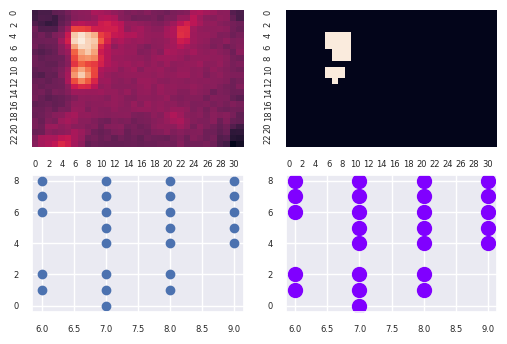

numOfClusters = 1
Number of clusters = 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:134: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


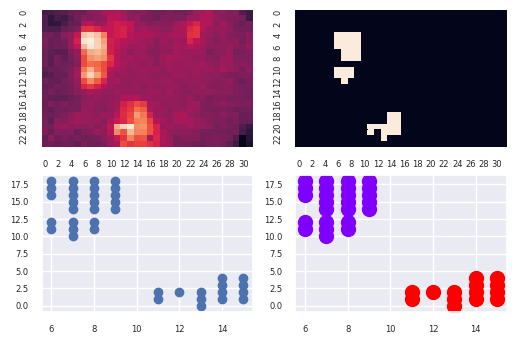

numOfClusters = 2
Number of clusters = 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:134: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


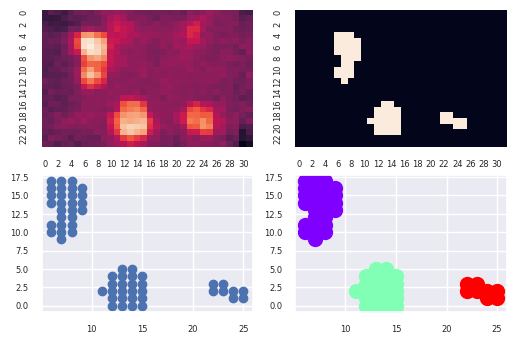

numOfClusters = 3
Number of clusters = 4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:134: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


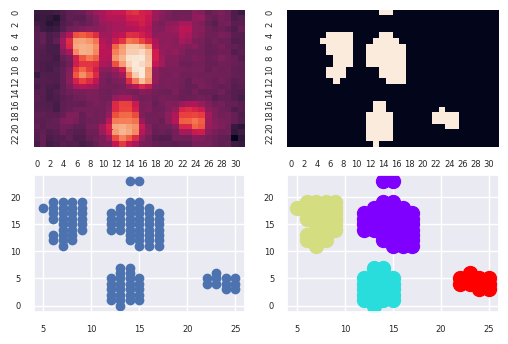

numOfClusters = 4
Number of clusters = 5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:134: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


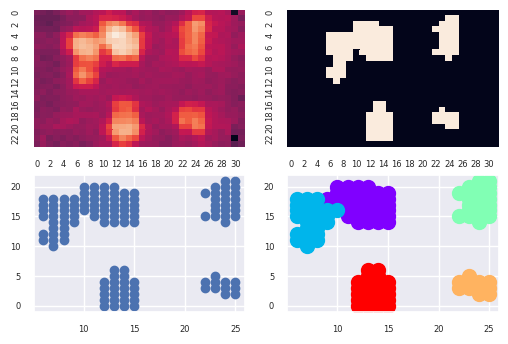

numOfClusters = 5
Number of clusters = 6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:134: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


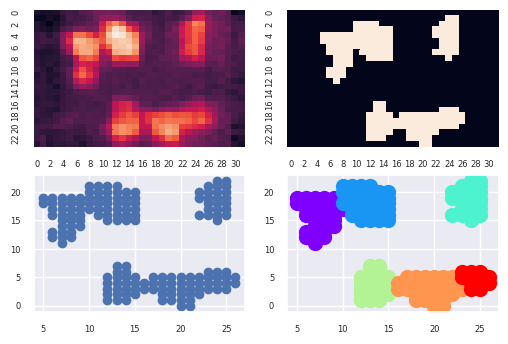

numOfClusters = 6


In [2]:
#-------------------------------------------
#-------------------MAIN--------------------
#-------------------------------------------
threshold = 26
distance_t = 20
plot_enable = True
csv_data = loadData(only_1to6 = True)

for csv_line in csv_data:
  
  heat_vector_int = getHeatData(csv_line)
  heat_vector_float = convertIntVectorToFloatVector(heat_vector_int)
  heat_matrix_float = convertVectorToMatrix(heat_vector_float)

  heat_matrix_threasholded_float = convertVectorToBinaryMatrixWithThreshold(heat_vector_float, threshold)

  #plot heat_matrix_float and heat_matrix_threasholded_float
  if plot_enable == True:
    plt.figure(dpi=100)
    plt.subplot(2,2,1)
    ax = sns.heatmap(heat_matrix_float,cbar=False)
    plt.subplot(2,2,2)
    ax = sns.heatmap(heat_matrix_threasholded_float,cbar=False)

  if sum(sum(heat_matrix_threasholded_float))>1:
    numOfClusters = findBlobsWithHierarchicalClustering(heat_matrix_threasholded_float.copy(), plot_enable, distance_t, 'ward')
  else:
    numOfClusters = 0

  if plot_enable == True:
    print(f'numOfClusters = {numOfClusters}')

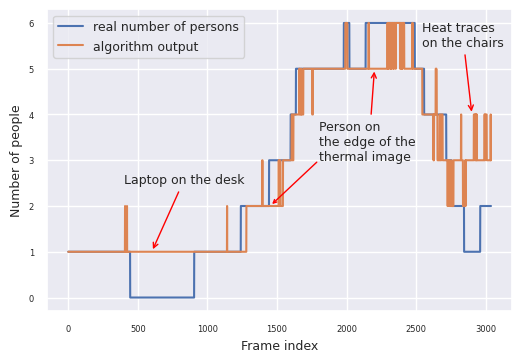

In [ ]:
csv_data = loadData(only_1to6 = False)

threshold = 26
plot_enable = False

for distance_t in [20]:
  clusters = []
  temp_avg = []

  for csv_line in csv_data:
  
    heat_vector_int = getHeatData(csv_line)
    heat_vector_float = convertIntVectorToFloatVector(heat_vector_int)
    heat_matrix_float = convertVectorToMatrix(heat_vector_float)

    heat_matrix_threasholded_float = convertVectorToBinaryMatrixWithThreshold(heat_vector_float, threshold)

    #plot heat_matrix_float and heat_matrix_threasholded_float
    if plot_enable == True:
      plt.figure(dpi=100)
      plt.subplot(2,2,1)
      ax = sns.heatmap(heat_matrix_float,cbar=False)
      plt.subplot(2,2,2)
      ax = sns.heatmap(heat_matrix_threasholded_float,cbar=False)

    if sum(sum(heat_matrix_threasholded_float))>1:
      numOfClusters = findBlobsWithHierarchicalClustering(heat_matrix_threasholded_float.copy(), plot_enable, distance_t, 'ward')
    else:
      numOfClusters = 0

    if plot_enable == True:
      print(f'numOfClusters = {numOfClusters}')
    clusters.append(numOfClusters)
    
  #error.append(sum(abs(clusters_real[1000::]-clusters[1000::])))

plt.figure(dpi=100)
plt.plot(clusters_real, label="real number of persons")
plt.plot(clusters, label="algorithm output")
plt.legend(loc="upper left", prop={'size': 9})
plt.annotate("Laptop on the desk", xy=(600,1), xytext=(400, 2.5), size=9, arrowprops={"arrowstyle":"->", "color":"red"})
plt.annotate("Heat traces \non the chairs", xy=(2900,4), xytext=(2540, 5.5), size=9, arrowprops={"arrowstyle":"->", "color":"red"})
plt.annotate("Person on \nthe edge of the \nthermal image", xy=(2200,5), xytext=(1800, 3), size=9, arrowprops={"arrowstyle":"->", "color":"red"})
plt.annotate("", xy=(1450,2), xytext=(1800, 3), arrowprops={"arrowstyle":"->", "color":"red"})

plt.xlabel("Frame index", fontsize=9)
plt.ylabel("Number of people", fontsize=9)
plt.show()

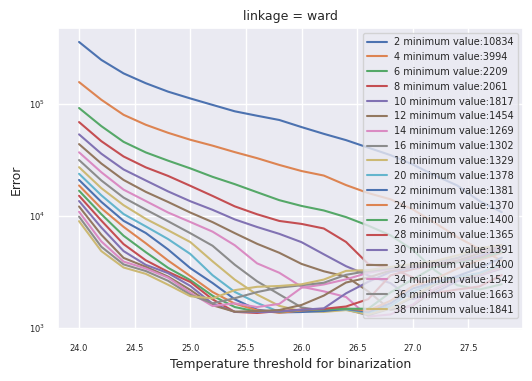

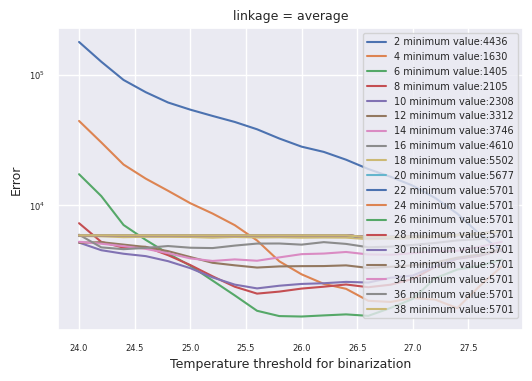

KeyboardInterrupt: ignored

In [ ]:
#in agglomerative clustering, parameters can vary acoording:
#linkage: ['ward', 'average', 'maximum', 'single']
#distance threshold: range(0,30)
#in binarization 
#temperature threshold: [x / 10.0 for x in range(240, 290, 1)] 

csv_data = loadData(only_1to6 = False)

plot_enable = False

for linkage_ in ['ward', 'average', 'complete', 'single']:
  errors = []
  for distance_t in range(2,40,2):
    error = []
    temp_thresholds = [x / 10.0 for x in range(240, 280, 2)]
    for temp_threshold in temp_thresholds:
      clusters = []
      temp_avg = []

      for csv_line in csv_data:
      
        heat_vector_int = getHeatData(csv_line)
        heat_vector_float = convertIntVectorToFloatVector(heat_vector_int)
        heat_matrix_float = convertVectorToMatrix(heat_vector_float)

        heat_matrix_threasholded_float = convertVectorToBinaryMatrixWithThreshold(heat_vector_float, temp_threshold)

        #plot heat_matrix_float and heat_matrix_threasholded_float
        if plot_enable == True:
          plt.figure(dpi=100)
          plt.subplot(2,2,1)
          ax = sns.heatmap(heat_matrix_float,cbar=False)
          plt.subplot(2,2,2)
          ax = sns.heatmap(heat_matrix_threasholded_float,cbar=False)

        if sum(sum(heat_matrix_threasholded_float))>1:
          numOfClusters = findBlobsWithHierarchicalClustering(heat_matrix_threasholded_float.copy(), plot_enable, distance_t, linkage_)
        else:
          numOfClusters = 0

        if plot_enable == True:
          print(f'numOfClusters = {numOfClusters}')
        clusters.append(numOfClusters)
        
      error.append(sum(abs(clusters_real-clusters)))
    errors.append(error)

  plt.figure(dpi=100)
  for index, distance_temperature in enumerate(range(2,40,2)):
    ax = plt.plot(temp_thresholds, errors[index],label=str(distance_temperature)+" minimum value:"+str(min(errors[index])))
  plt.xlabel("Temperature threshold for binarization", fontsize=9)
  plt.ylabel("Error", fontsize=9)
  plt.yscale('log')
  plt.title('linkage = '+linkage_, fontsize='9')
  plt.legend(loc="upper right", prop={'size': 7})
  plt.show()

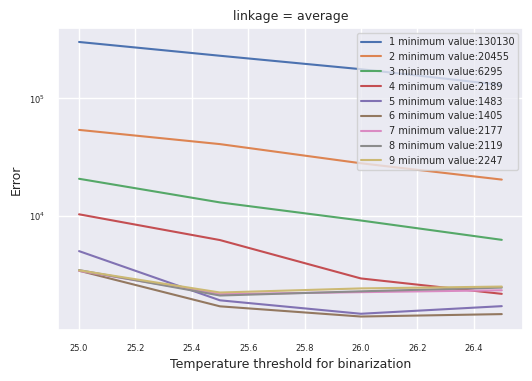

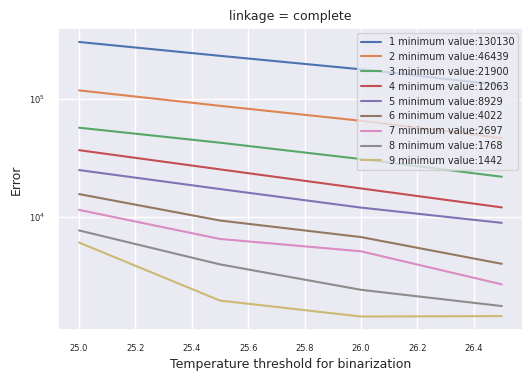

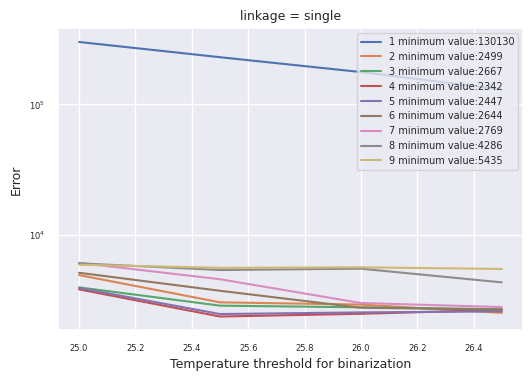

In [ ]:
#in agglomerative clustering, parameters can vary acoording:
#linkage: ['ward', 'average', 'maximum', 'single']
#distance threshold: range(0,30)
#in binarization 
#temperature threshold: [x / 10.0 for x in range(240, 290, 1)] 

csv_data = loadData(only_1to6 = False)

plot_enable = False

for linkage_ in ['average', 'complete', 'single']:
  errors = []
  for distance_t in range(1,10,1):
    error = []
    temp_thresholds = [x / 10.0 for x in range(250, 270, 5)]
    for temp_threshold in temp_thresholds:
      clusters = []
      temp_avg = []

      for csv_line in csv_data:
      
        heat_vector_int = getHeatData(csv_line)
        heat_vector_float = convertIntVectorToFloatVector(heat_vector_int)
        heat_matrix_float = convertVectorToMatrix(heat_vector_float)

        heat_matrix_threasholded_float = convertVectorToBinaryMatrixWithThreshold(heat_vector_float, temp_threshold)

        #plot heat_matrix_float and heat_matrix_threasholded_float
        if plot_enable == True:
          plt.figure(dpi=100)
          plt.subplot(2,2,1)
          ax = sns.heatmap(heat_matrix_float,cbar=False)
          plt.subplot(2,2,2)
          ax = sns.heatmap(heat_matrix_threasholded_float,cbar=False)

        if sum(sum(heat_matrix_threasholded_float))>1:
          numOfClusters = findBlobsWithHierarchicalClustering(heat_matrix_threasholded_float.copy(), plot_enable, distance_t, linkage_)
        else:
          numOfClusters = 0

        if plot_enable == True:
          print(f'numOfClusters = {numOfClusters}')
        clusters.append(numOfClusters)
        
      error.append(sum(abs(clusters_real-clusters)))
    errors.append(error)

  plt.figure(dpi=100)
  for index, distance_temperature in enumerate(range(1,10,1)):
    ax = plt.plot(temp_thresholds, errors[index],label=str(distance_temperature)+" minimum value:"+str(min(errors[index])))
  plt.xlabel("Temperature threshold for binarization", fontsize=9)
  plt.ylabel("Error", fontsize=9)
  plt.yscale('log')
  plt.title('linkage = '+linkage_, fontsize='9')
  plt.legend(loc="upper right", prop={'size': 7})
  plt.show()